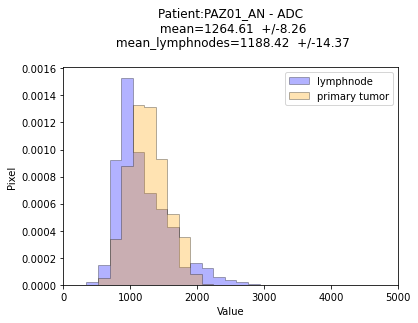

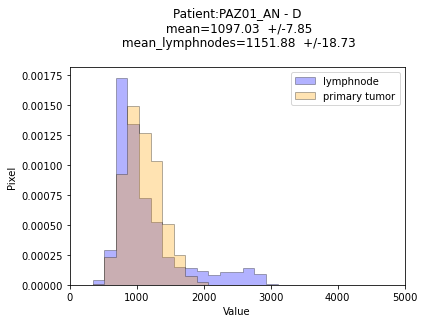

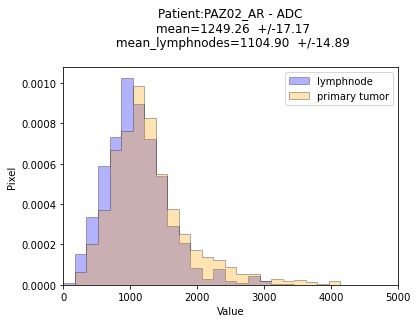

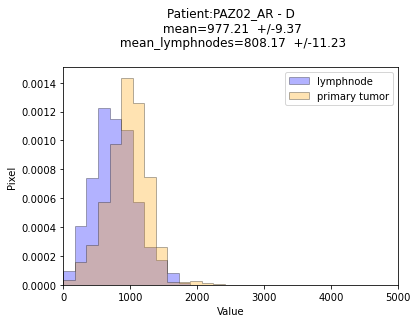

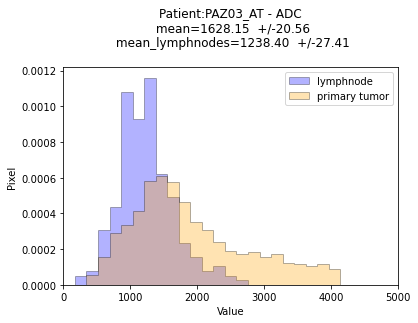

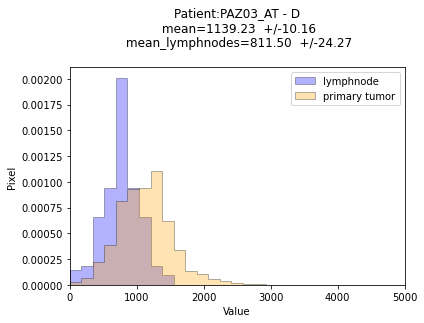

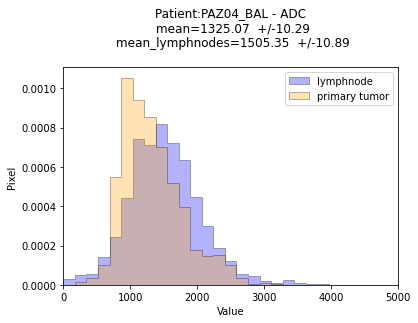

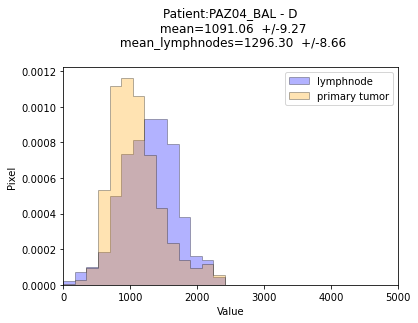

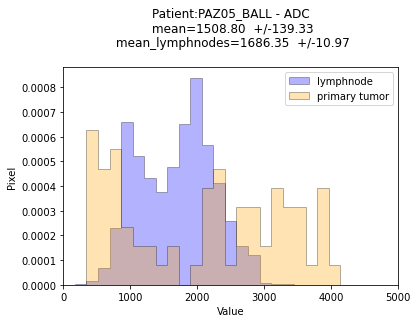

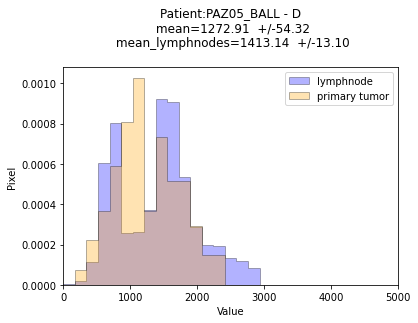

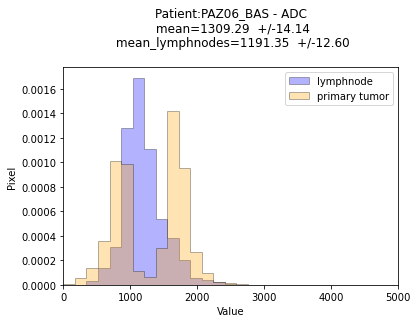

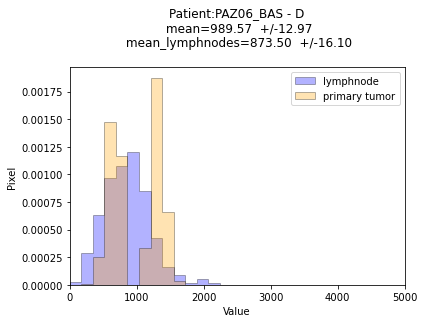

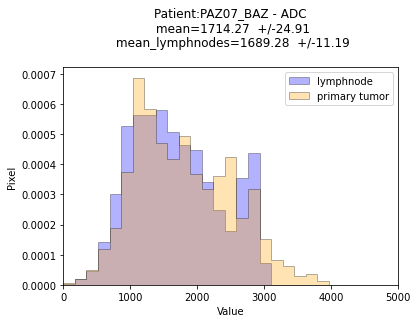

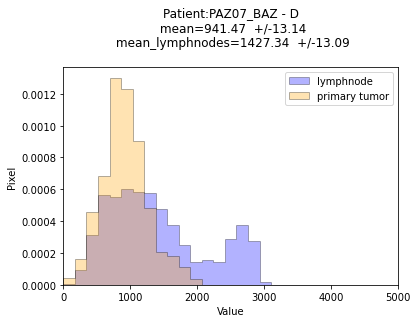

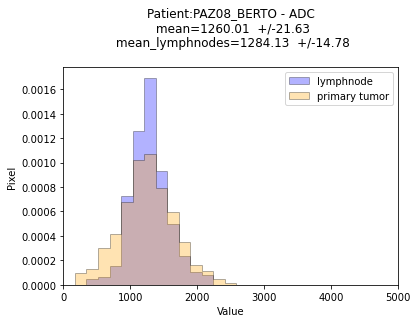

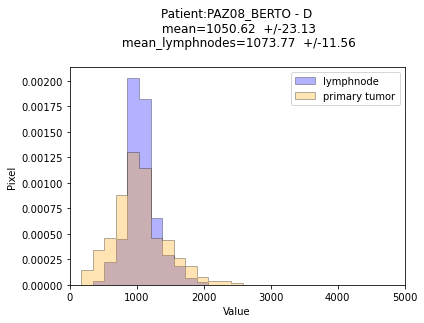

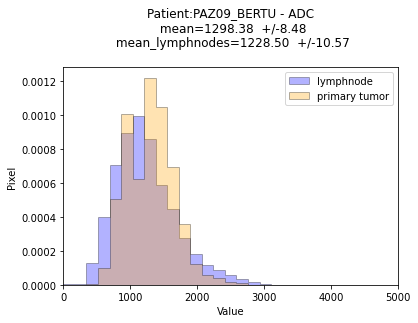

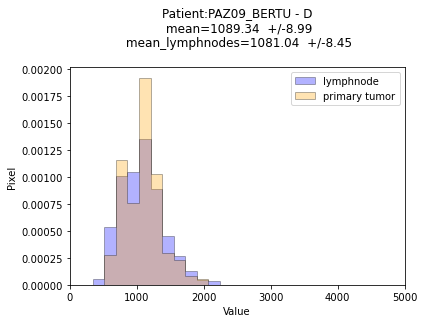

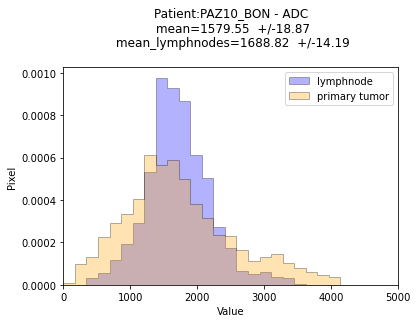

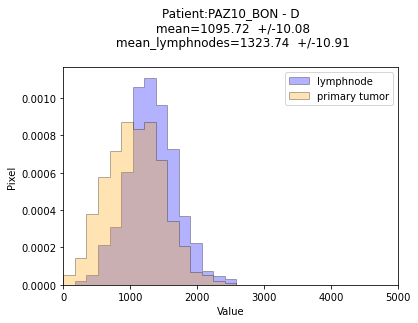

C:\Users\marya\anaconda3\lib\site-packages\numpy\lib\histograms.py:905: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges


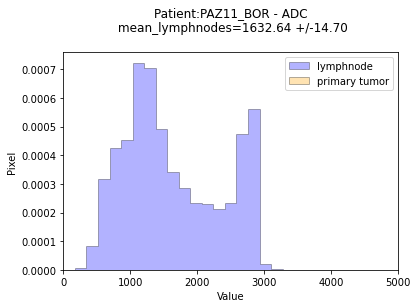

C:\Users\marya\anaconda3\lib\site-packages\numpy\lib\histograms.py:905: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges


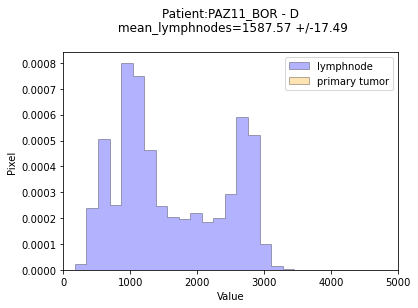

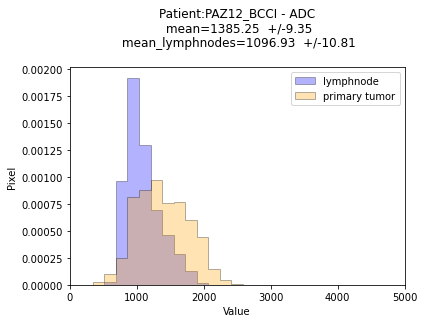

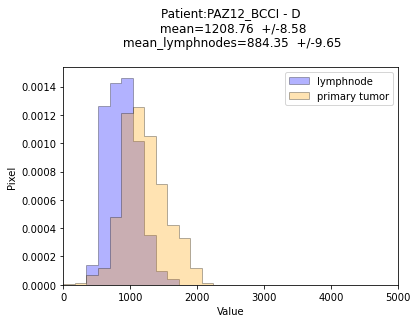

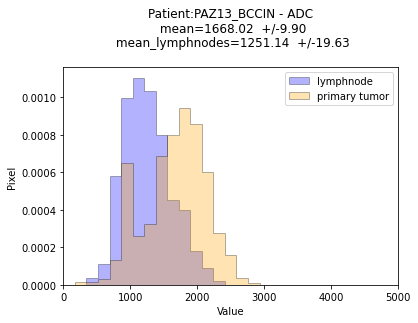

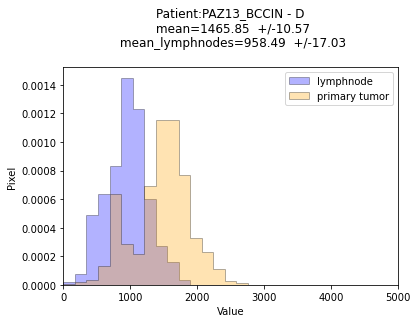

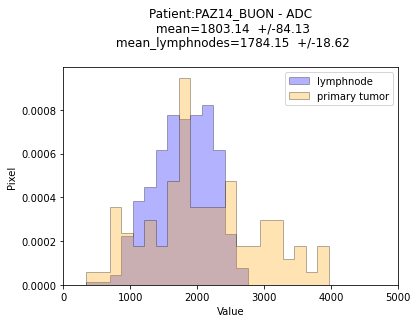

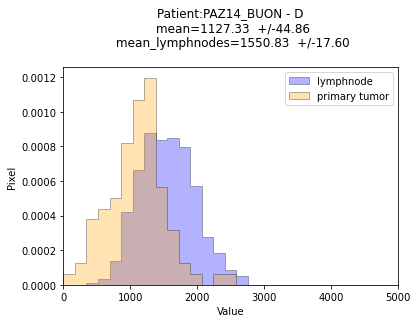

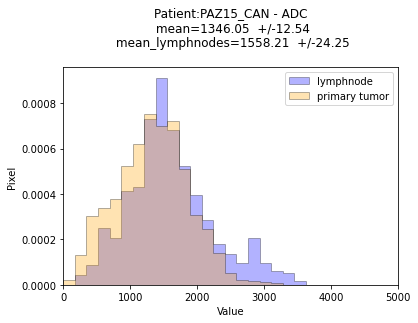

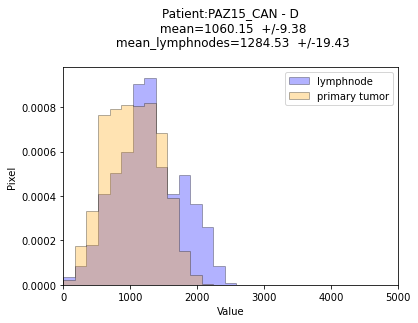

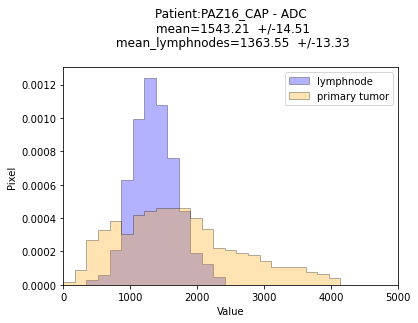

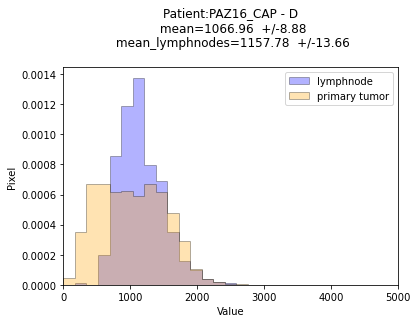

C:\Users\marya\anaconda3\lib\site-packages\numpy\lib\histograms.py:905: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges


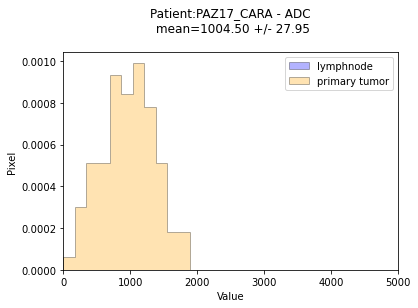

C:\Users\marya\anaconda3\lib\site-packages\numpy\lib\histograms.py:905: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges


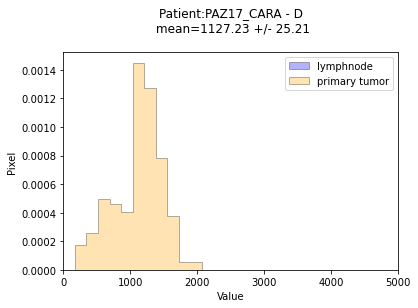

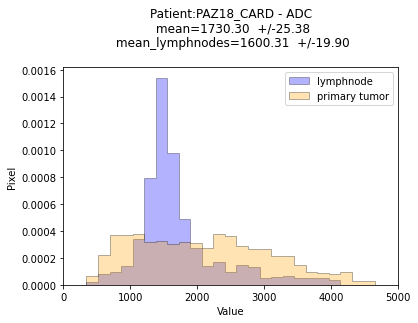

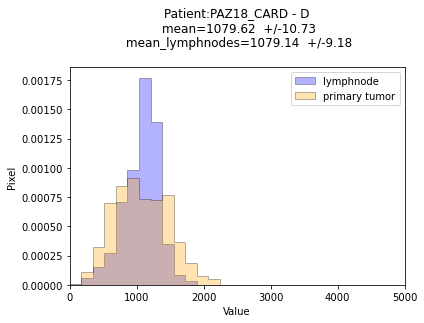

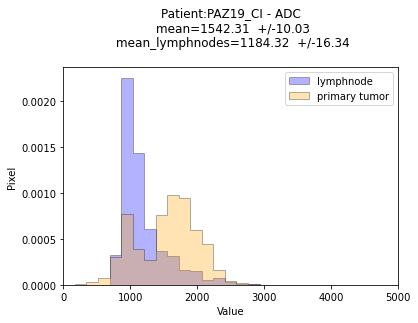

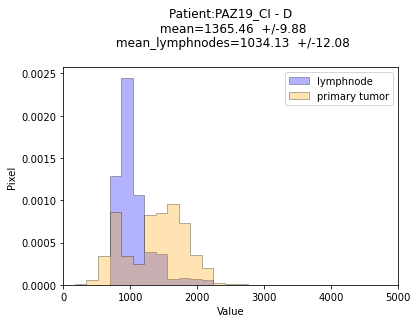

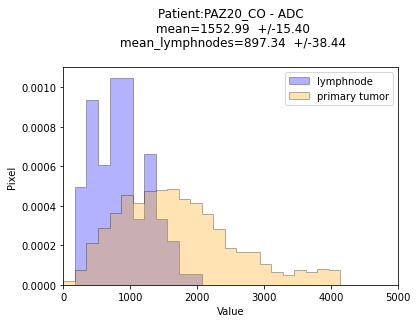

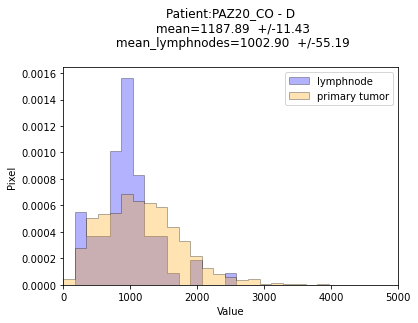

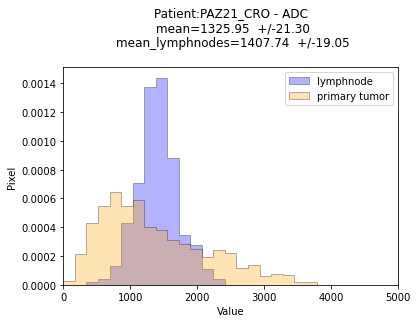

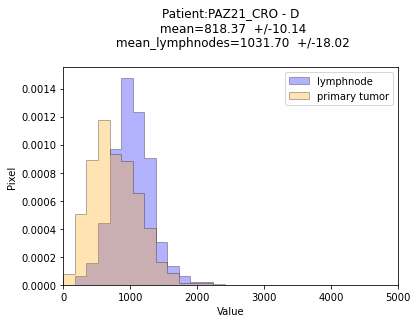

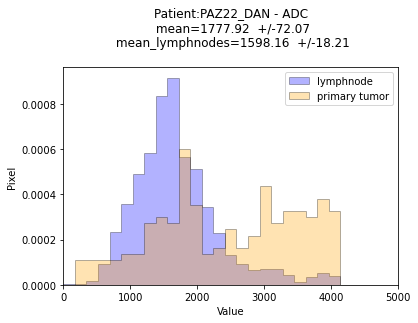

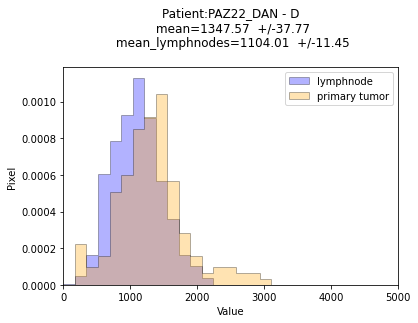

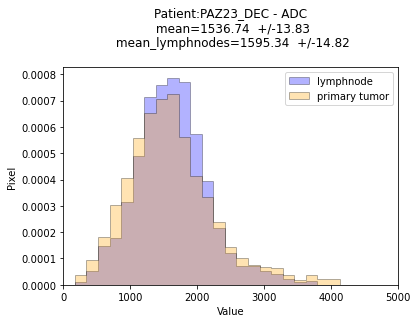

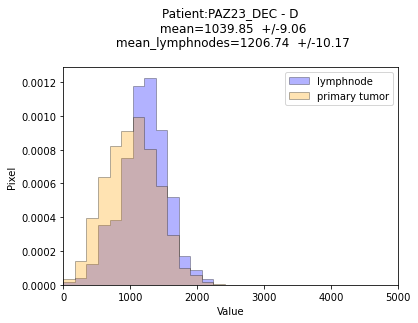

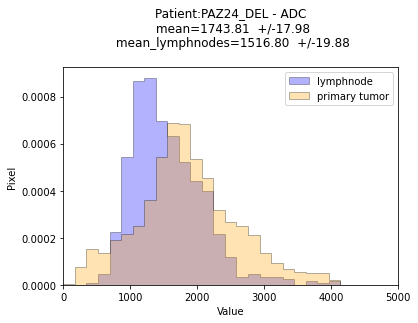

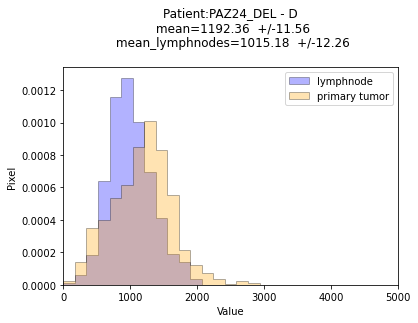

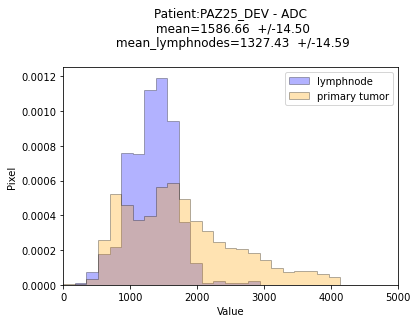

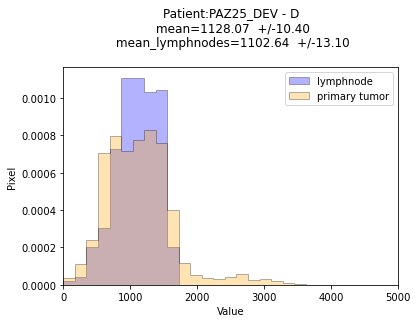

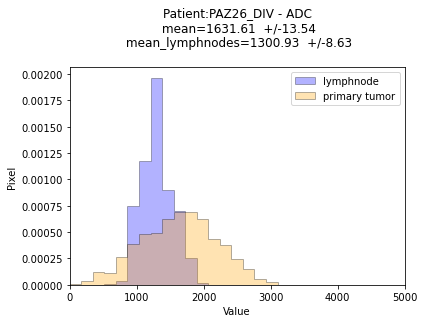

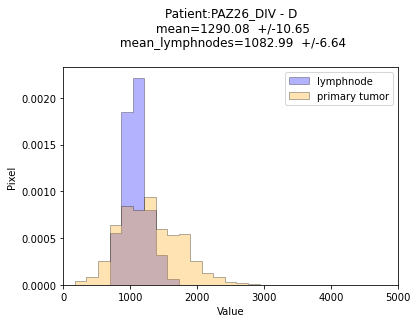

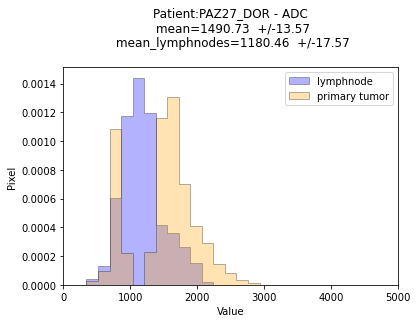

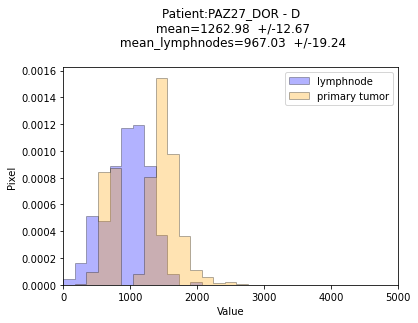

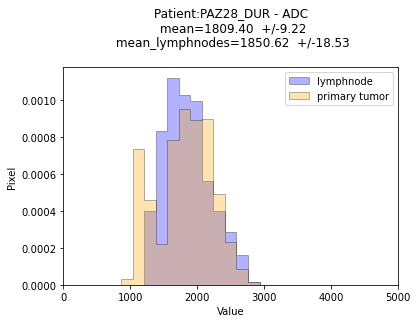

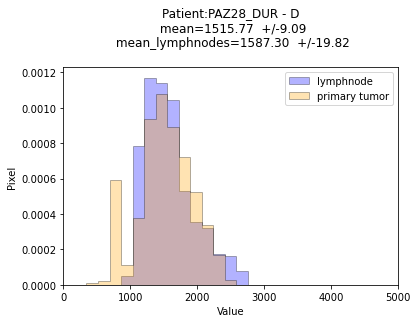

C:\Users\marya\anaconda3\lib\site-packages\numpy\lib\histograms.py:905: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges


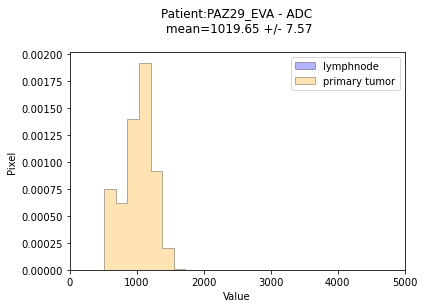

C:\Users\marya\anaconda3\lib\site-packages\numpy\lib\histograms.py:905: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges


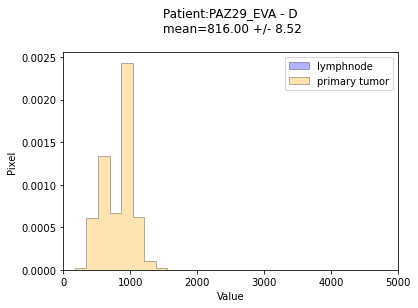

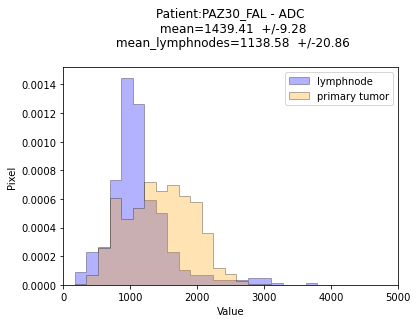

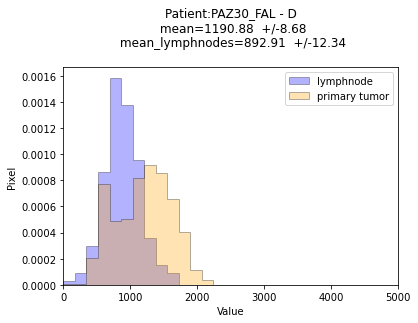

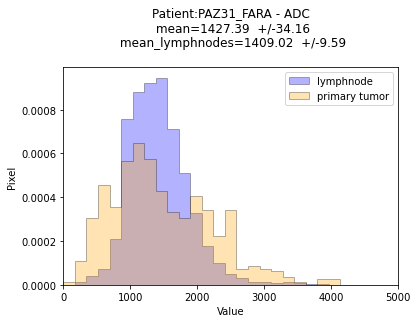

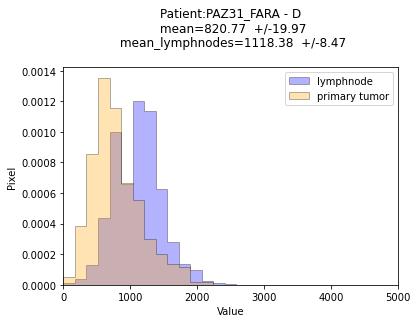

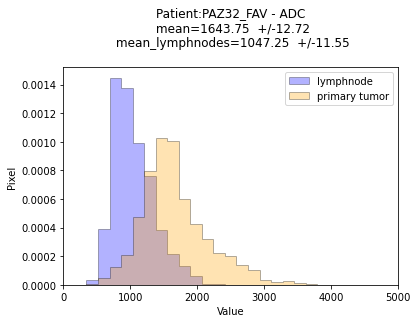

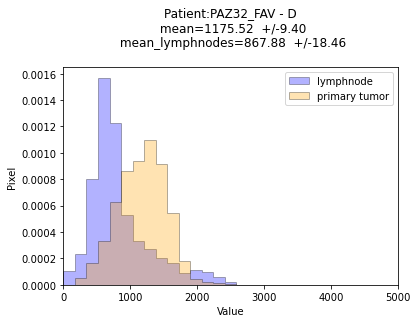

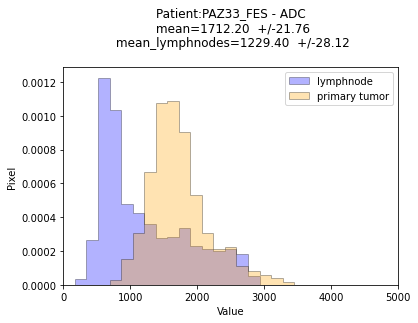

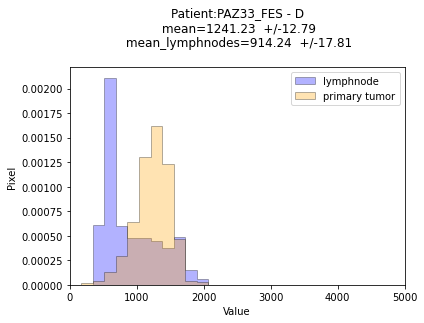

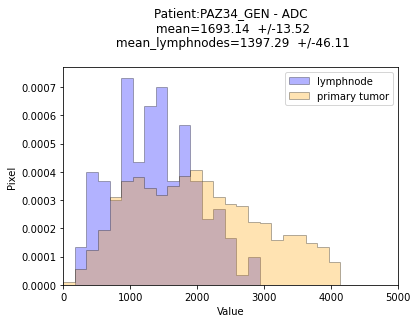

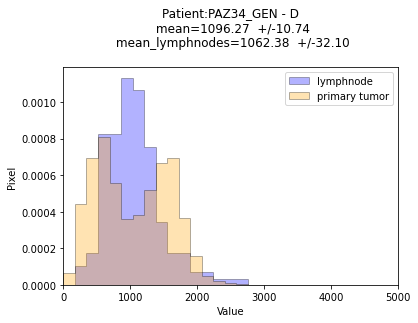

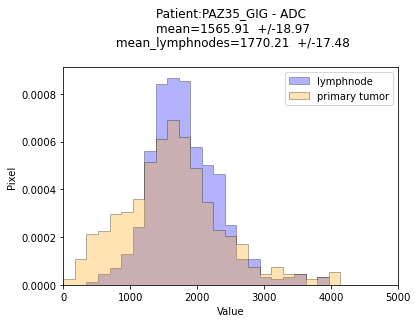

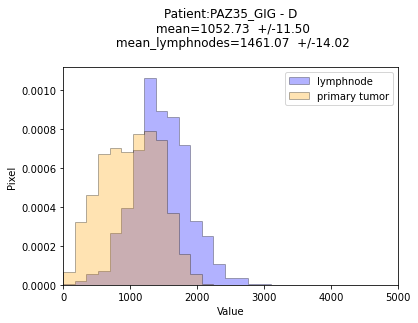

C:\Users\marya\anaconda3\lib\site-packages\numpy\lib\histograms.py:905: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges


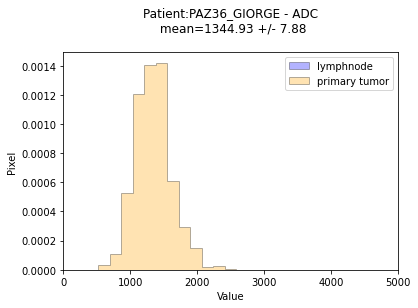

C:\Users\marya\anaconda3\lib\site-packages\numpy\lib\histograms.py:905: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges


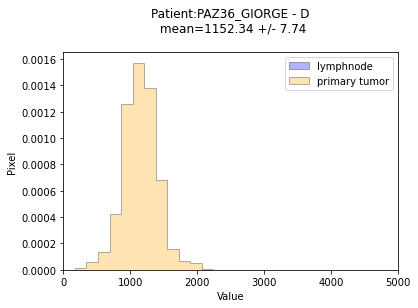

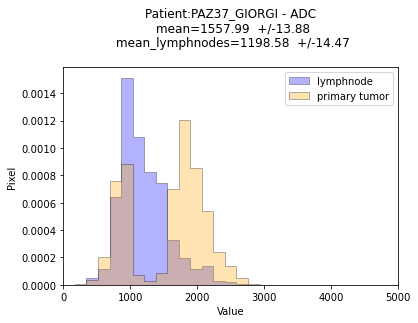

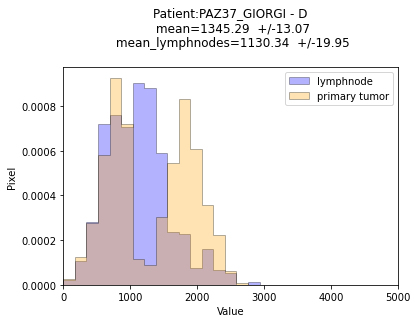

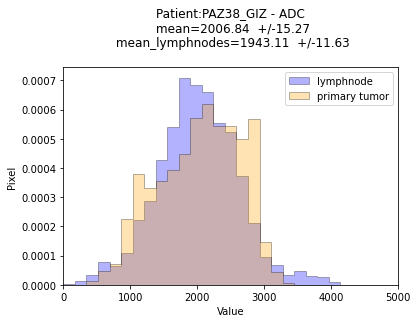

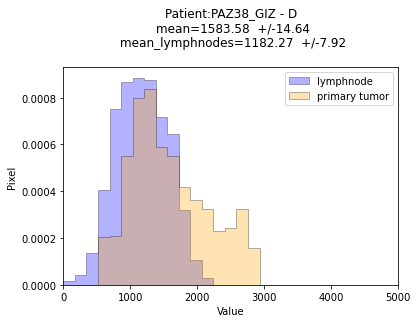

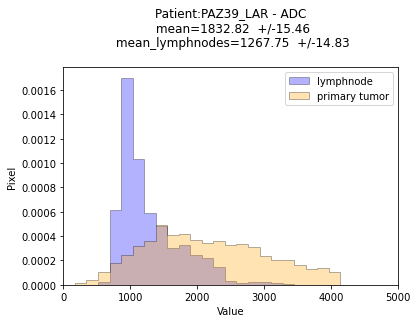

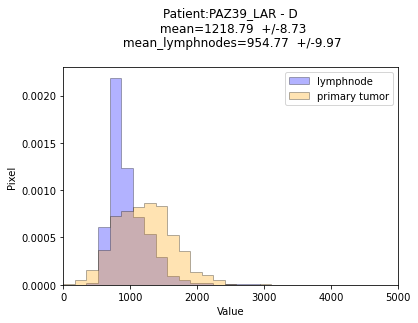

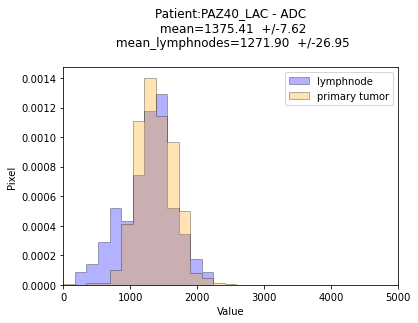

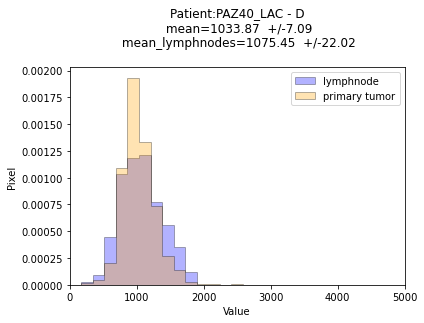

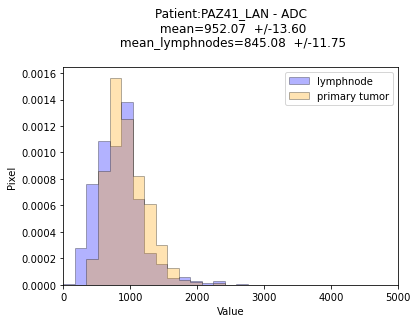

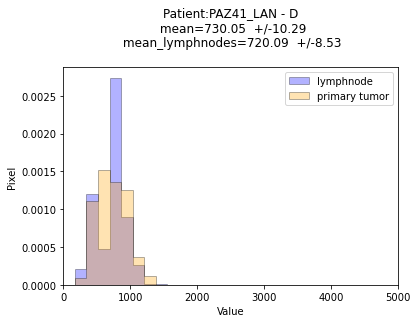

C:\Users\marya\anaconda3\lib\site-packages\numpy\lib\histograms.py:905: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges


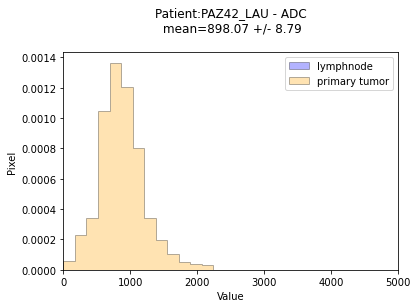

C:\Users\marya\anaconda3\lib\site-packages\numpy\lib\histograms.py:905: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges


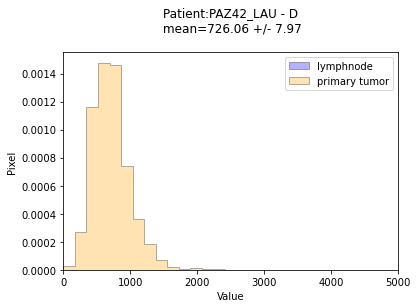

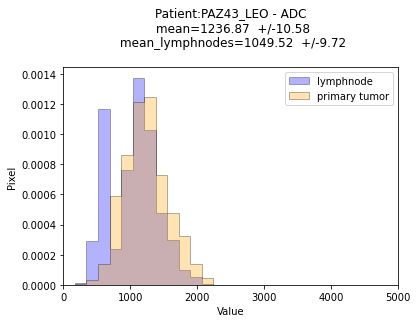

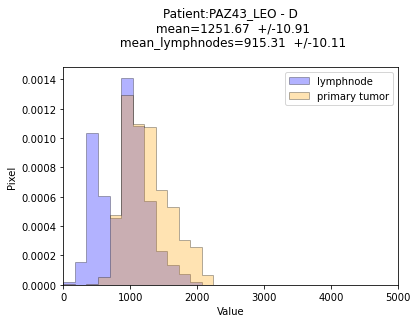

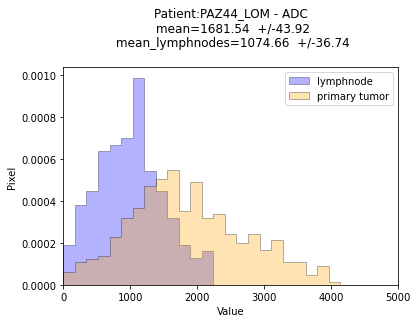

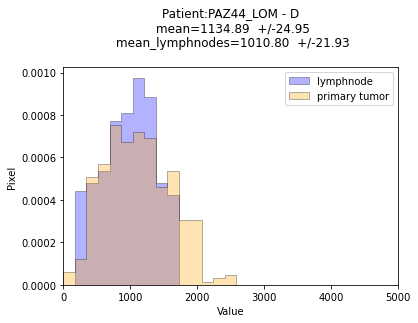

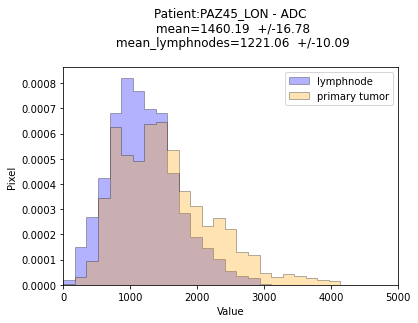

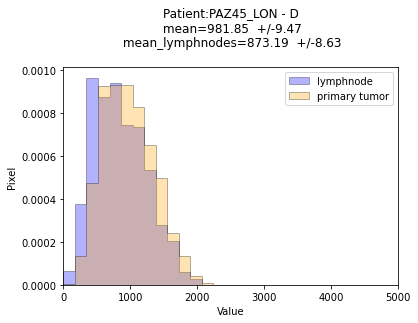

C:\Users\marya\anaconda3\lib\site-packages\numpy\lib\histograms.py:905: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges


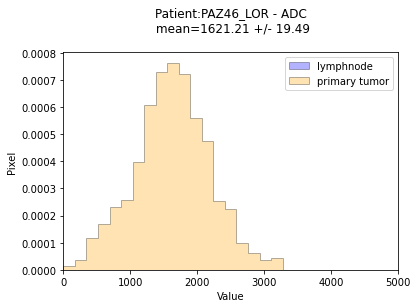

C:\Users\marya\anaconda3\lib\site-packages\numpy\lib\histograms.py:905: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges


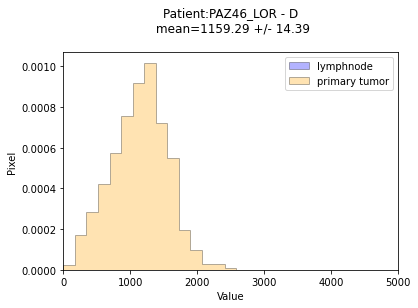

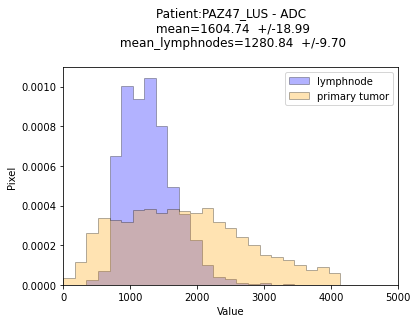

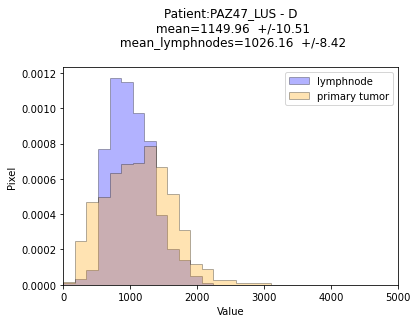

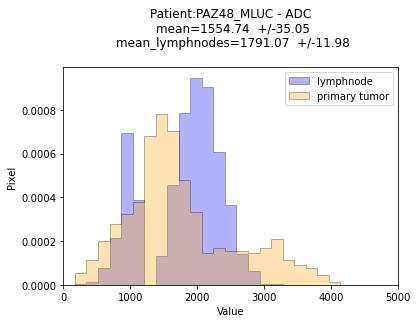

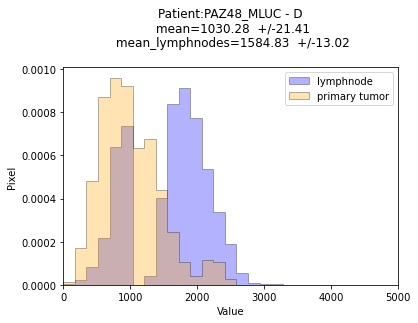

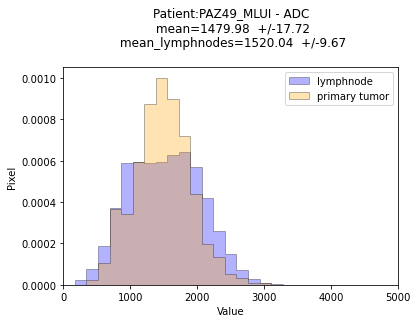

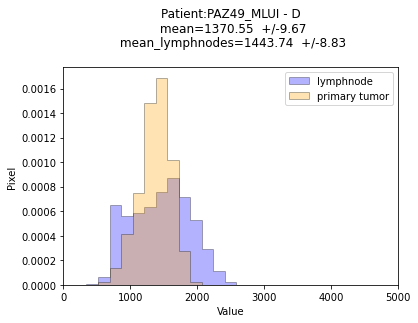

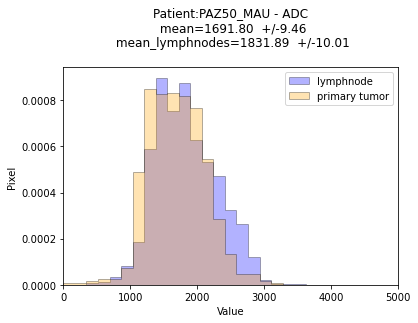

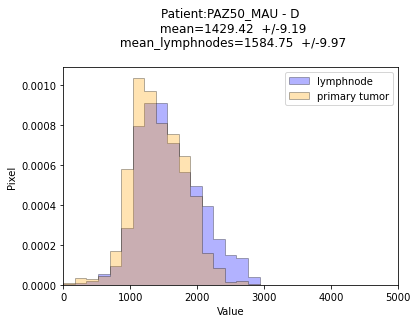

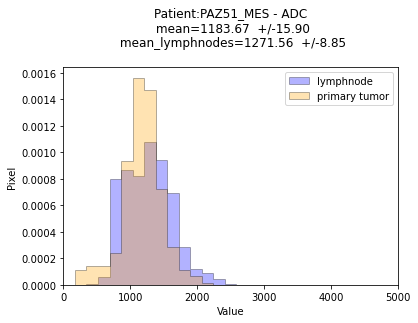

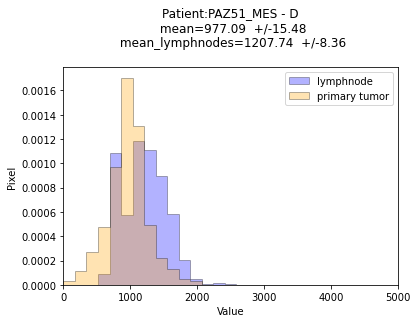

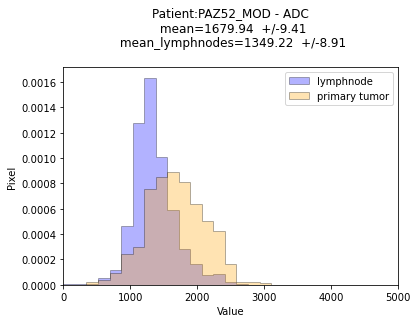

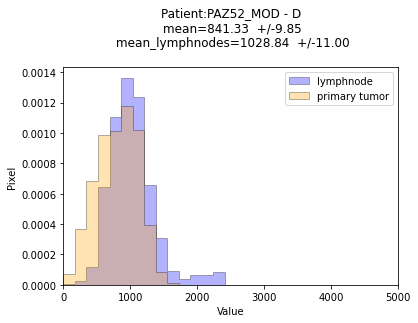

C:\Users\marya\anaconda3\lib\site-packages\numpy\lib\histograms.py:905: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges


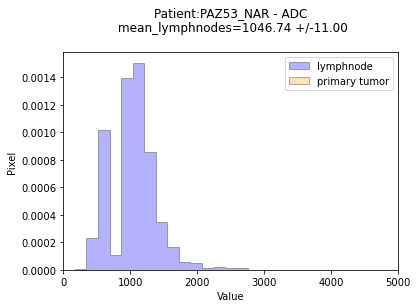

C:\Users\marya\anaconda3\lib\site-packages\numpy\lib\histograms.py:905: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges


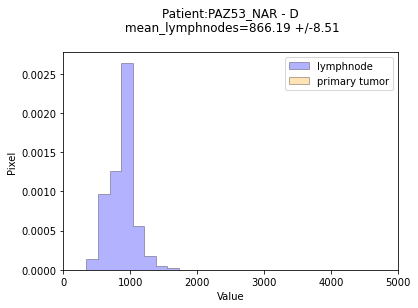

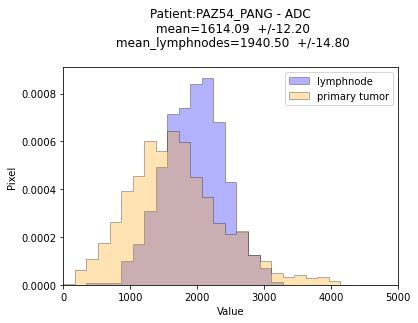

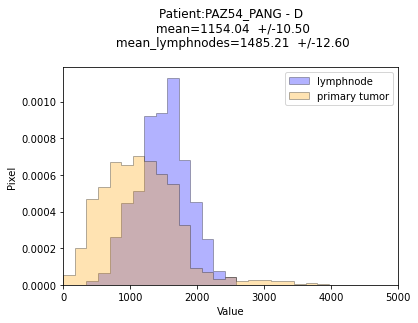

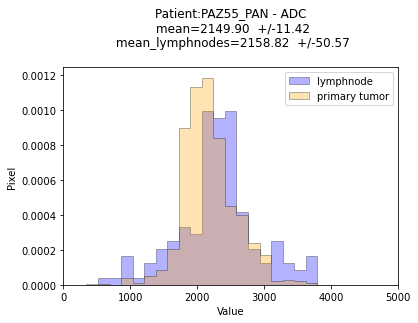

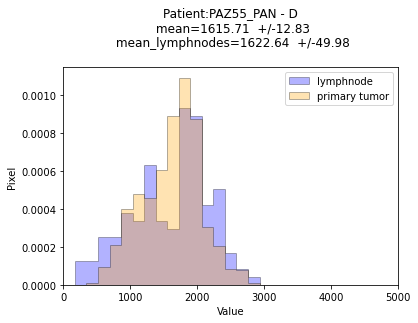

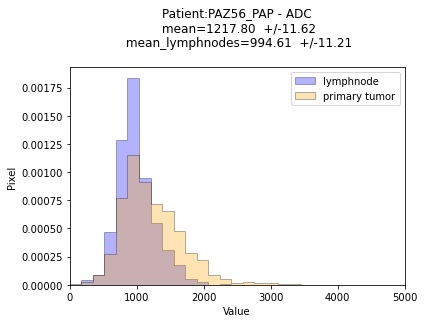

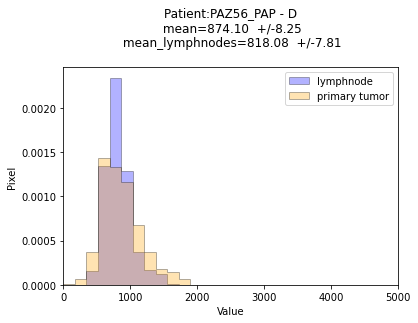

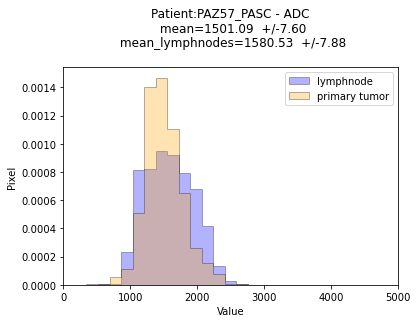

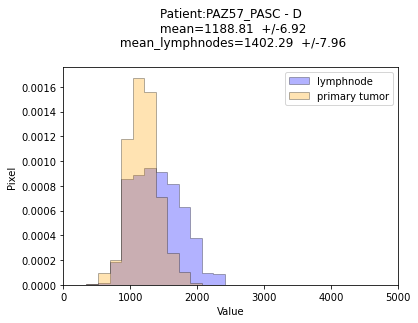

C:\Users\marya\anaconda3\lib\site-packages\numpy\lib\histograms.py:905: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges


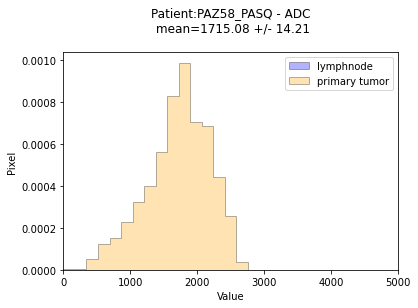

C:\Users\marya\anaconda3\lib\site-packages\numpy\lib\histograms.py:905: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges


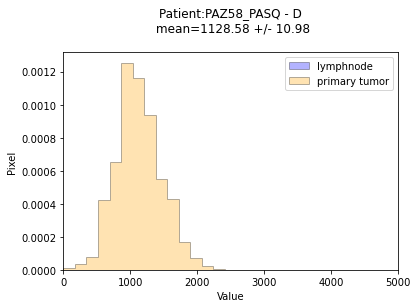

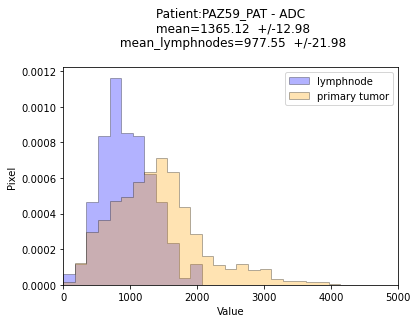

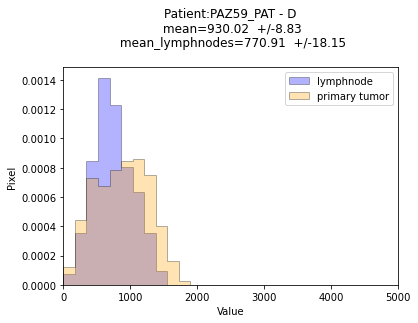

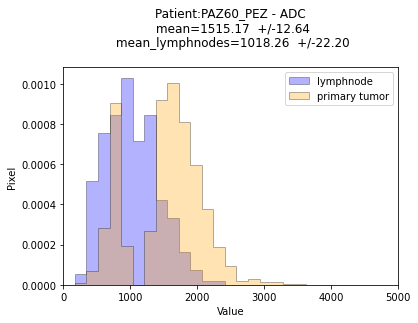

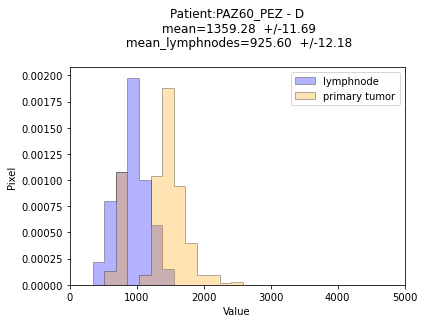

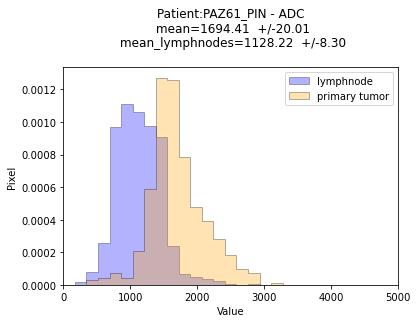

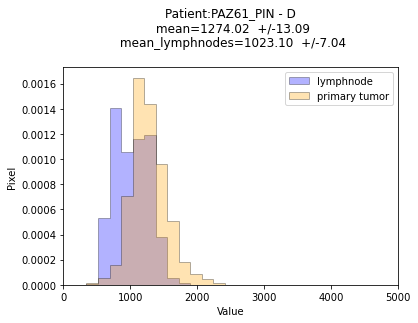

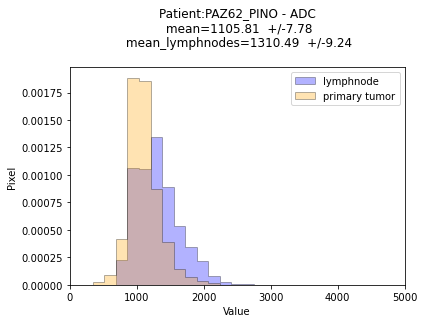

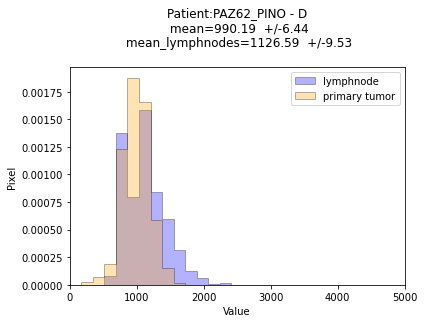

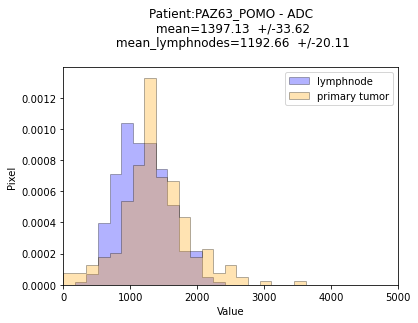

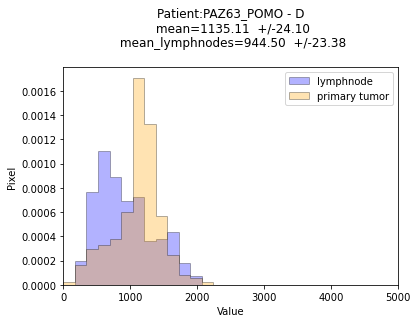

C:\Users\marya\anaconda3\lib\site-packages\numpy\lib\histograms.py:905: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges


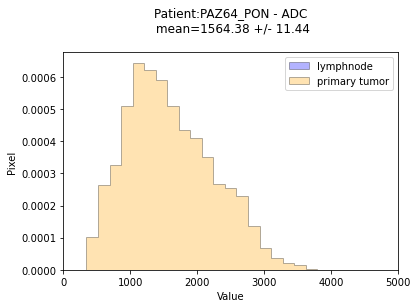

C:\Users\marya\anaconda3\lib\site-packages\numpy\lib\histograms.py:905: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges


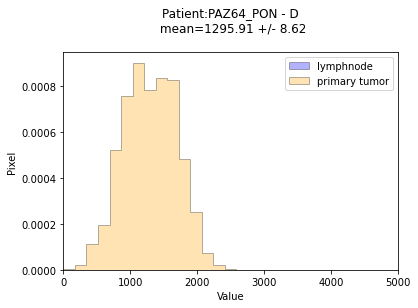

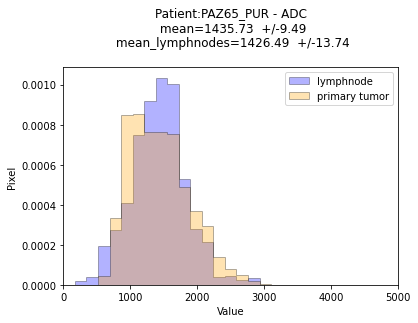

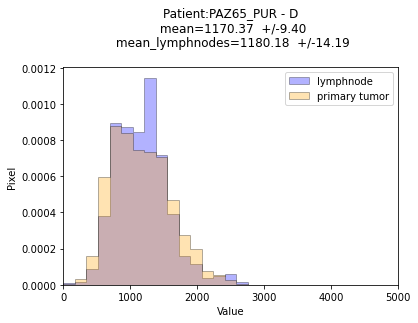

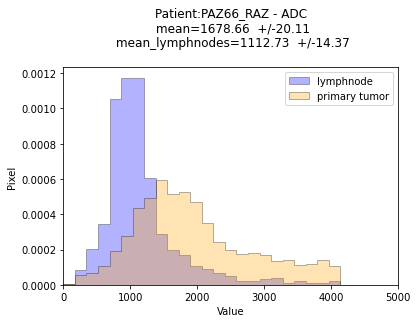

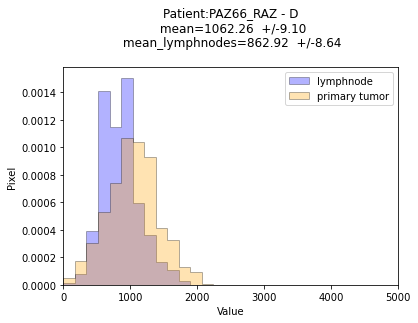

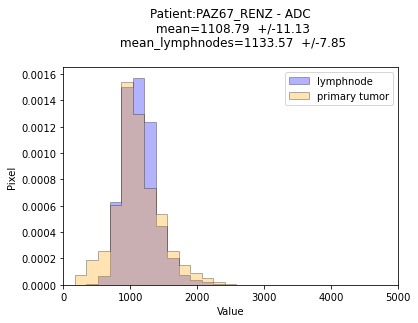

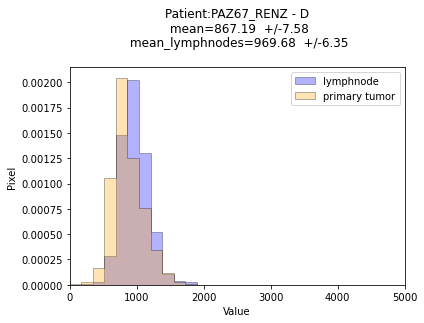

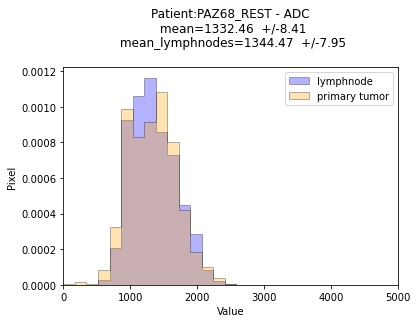

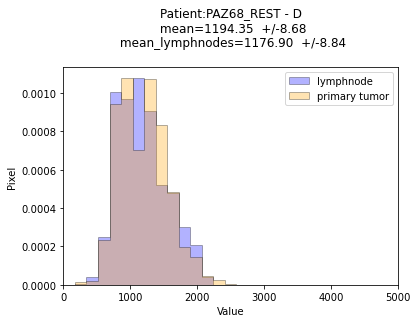

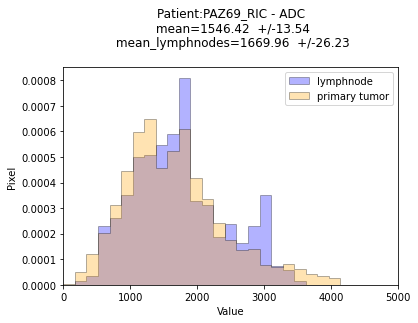

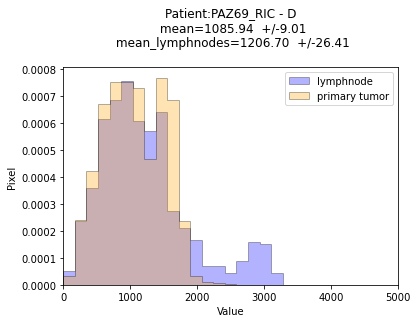

C:\Users\marya\anaconda3\lib\site-packages\numpy\lib\histograms.py:905: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges


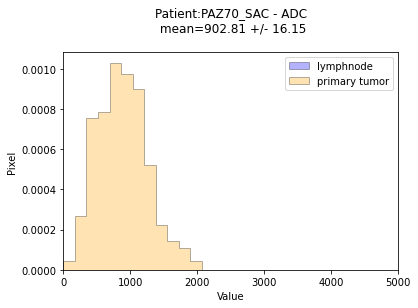

C:\Users\marya\anaconda3\lib\site-packages\numpy\lib\histograms.py:905: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges


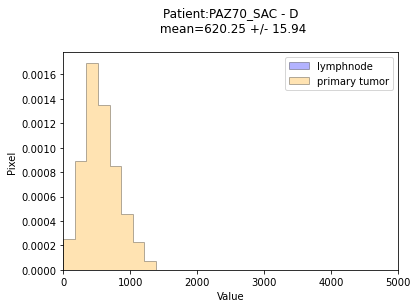

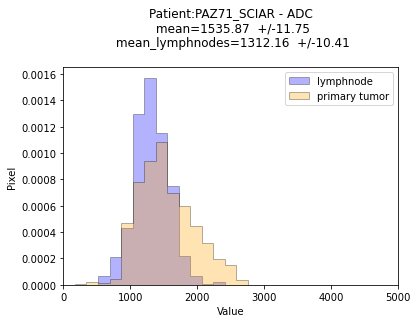

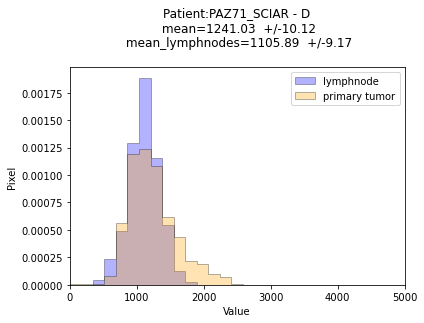

C:\Users\marya\anaconda3\lib\site-packages\numpy\lib\histograms.py:905: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges


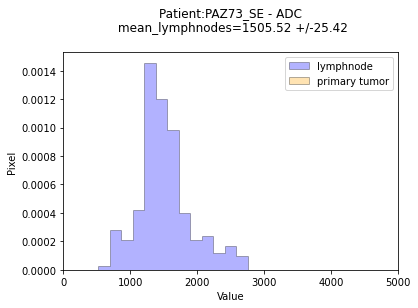

C:\Users\marya\anaconda3\lib\site-packages\numpy\lib\histograms.py:905: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges


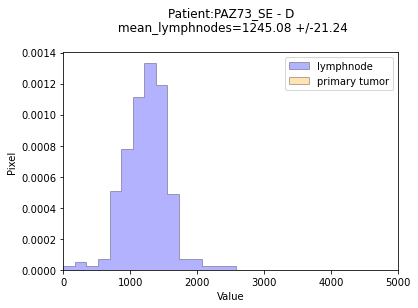

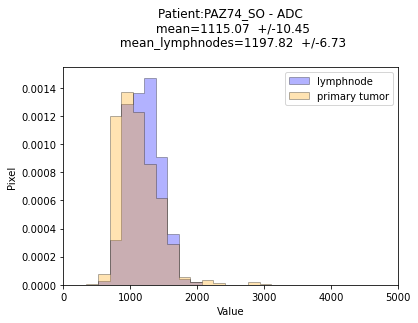

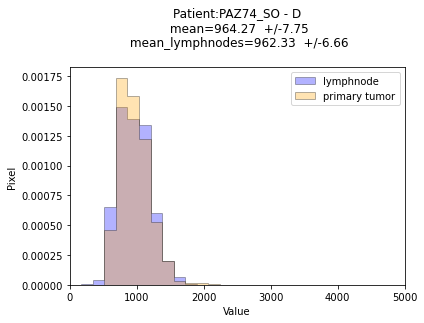

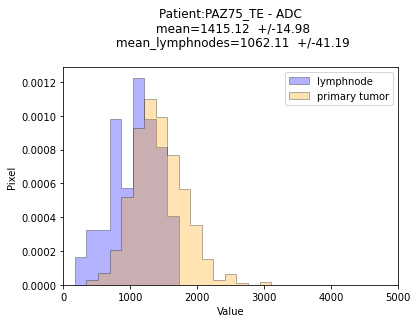

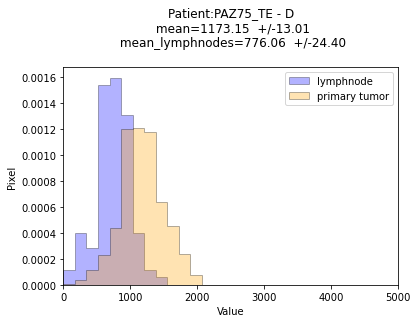

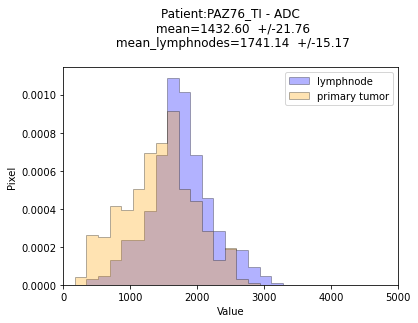

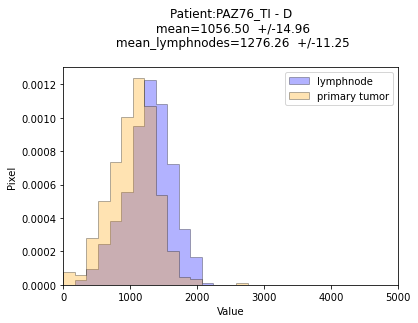

C:\Users\marya\anaconda3\lib\site-packages\numpy\lib\histograms.py:905: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges


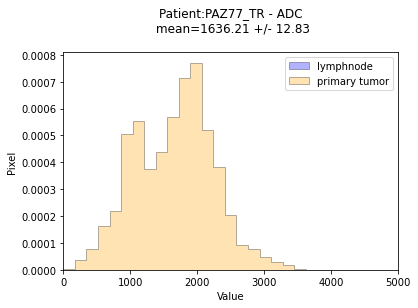

C:\Users\marya\anaconda3\lib\site-packages\numpy\lib\histograms.py:905: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges


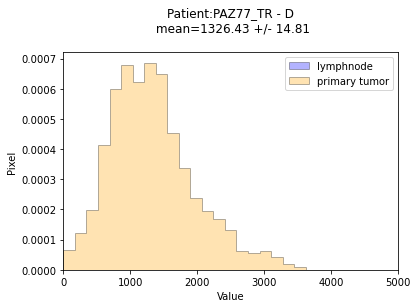

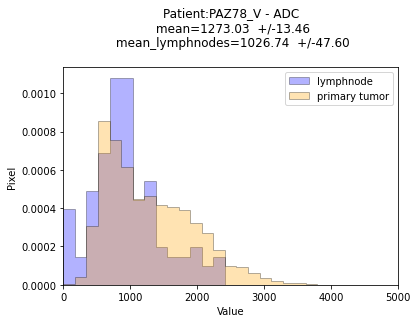

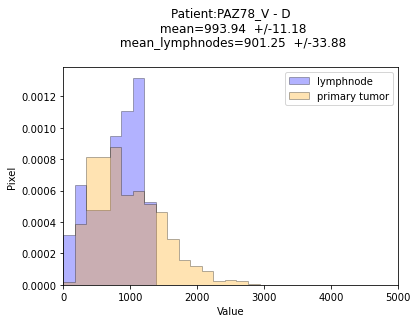

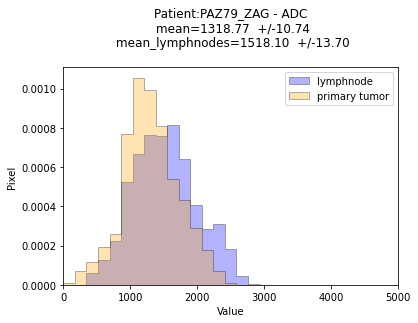

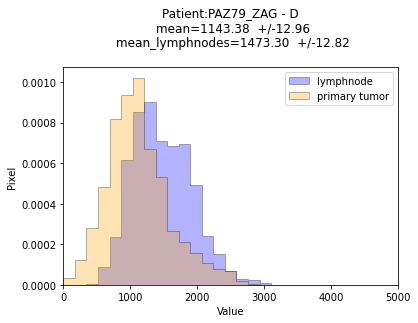

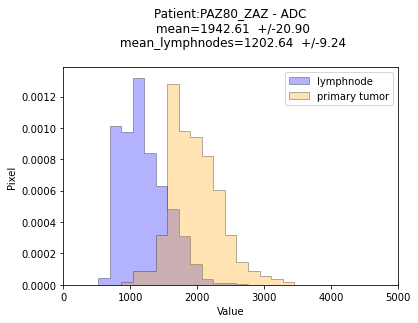

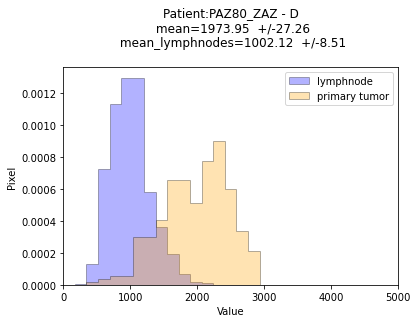

saved
saved


C:\Users\marya\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:345: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


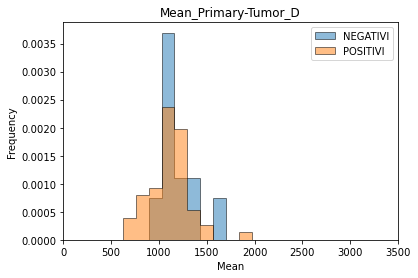

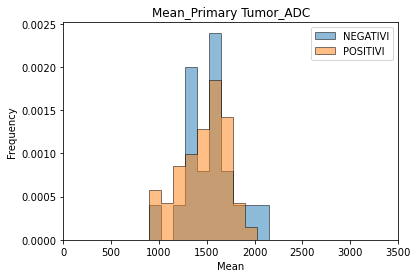

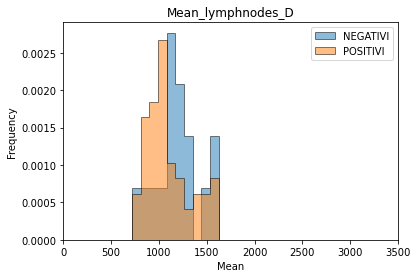

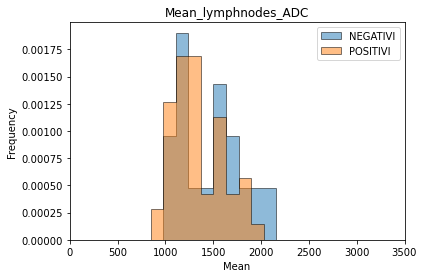

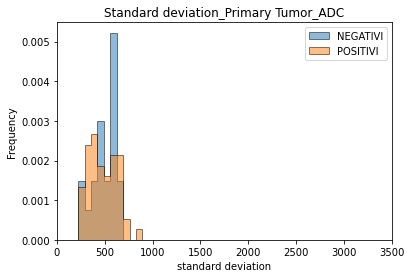

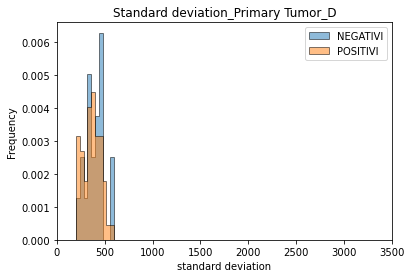

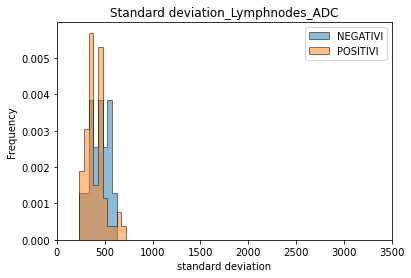

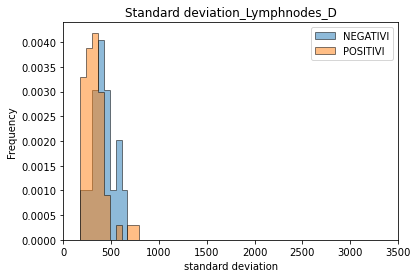

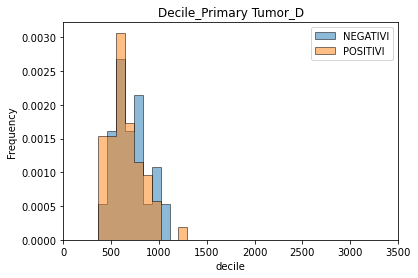

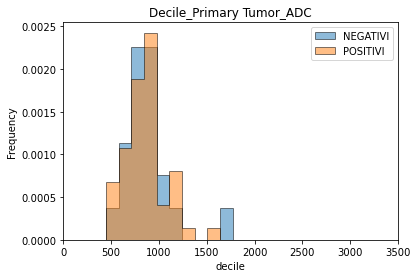

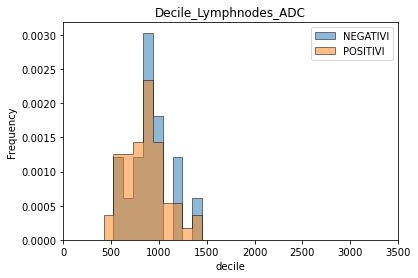

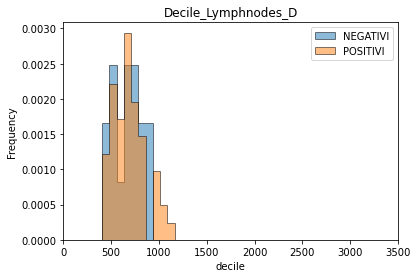

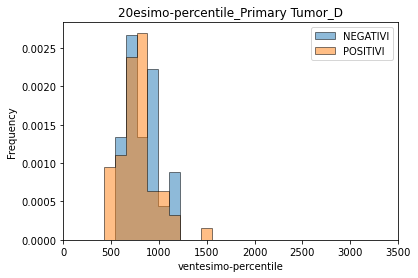

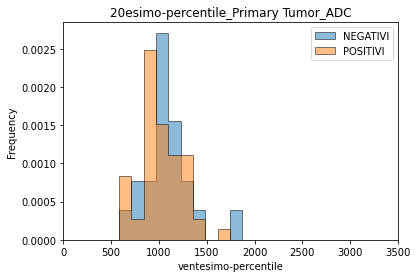

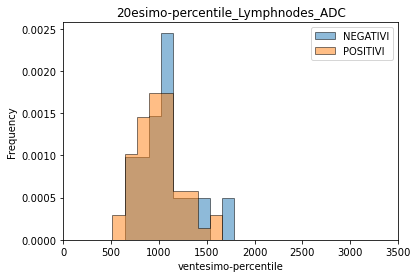

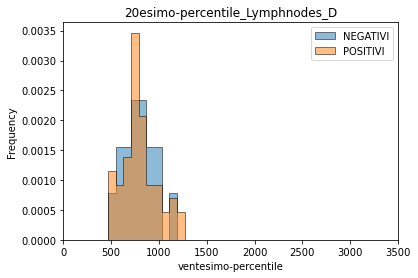

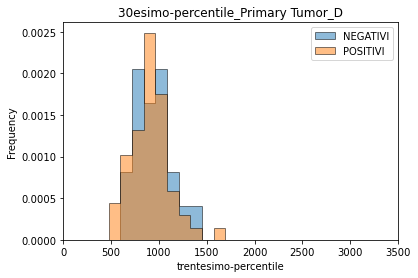

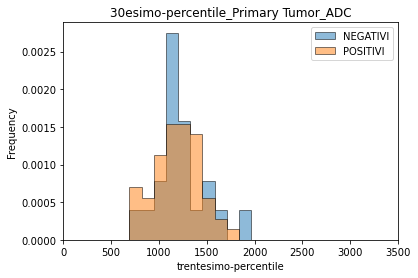

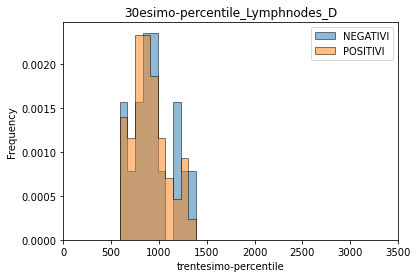

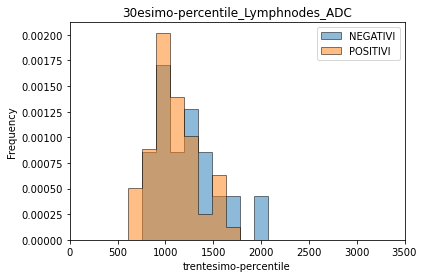

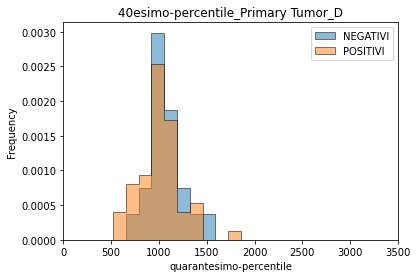

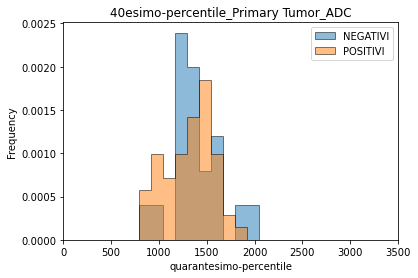

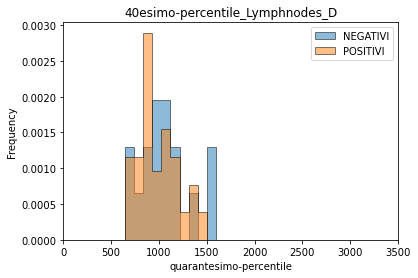

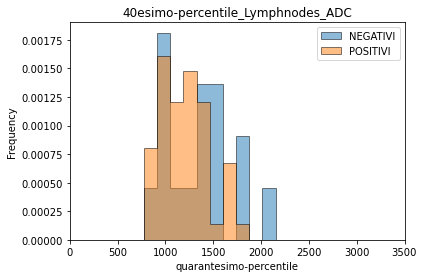

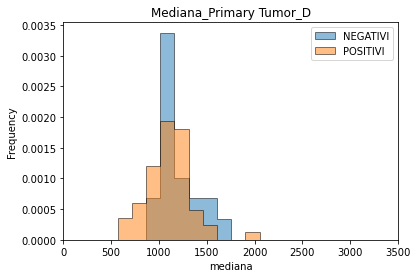

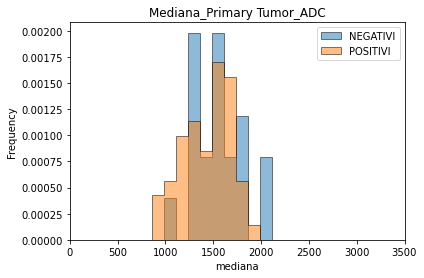

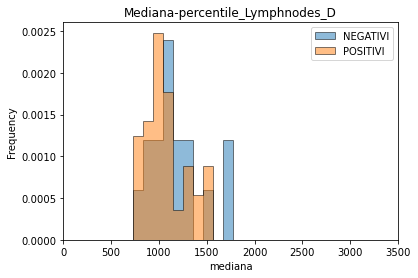

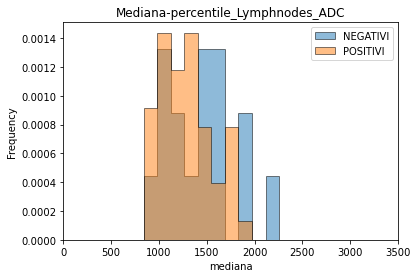

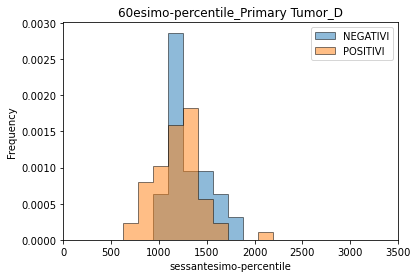

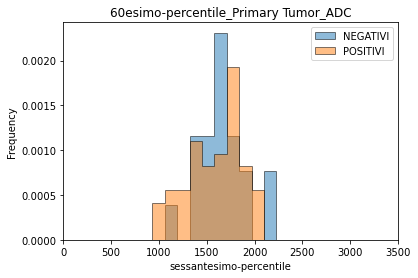

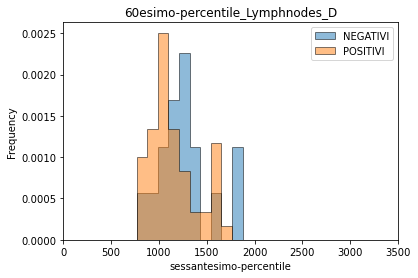

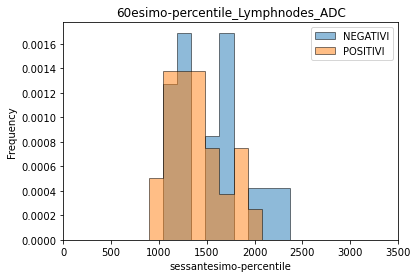

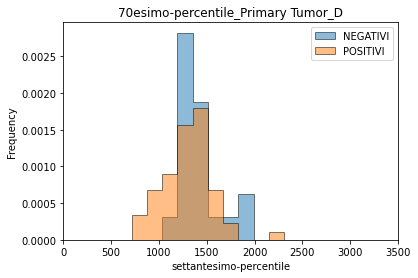

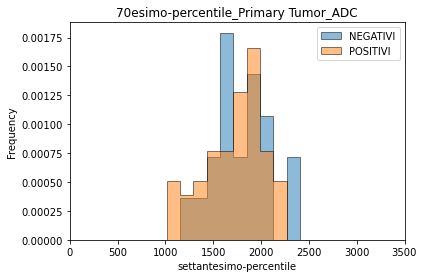

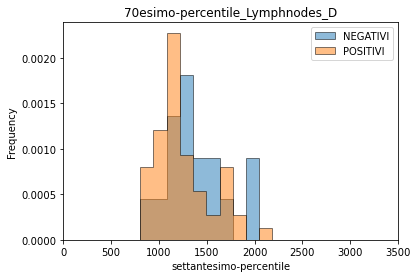

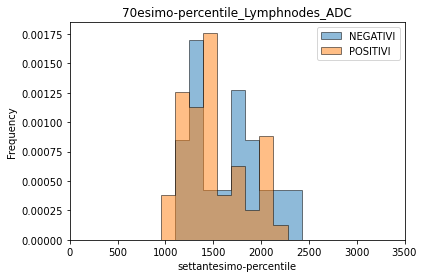

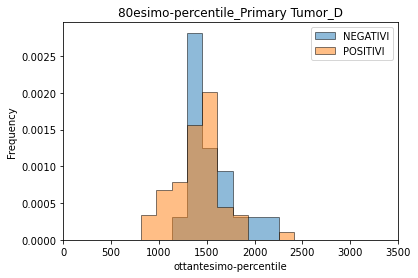

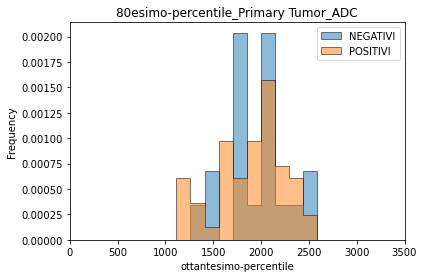

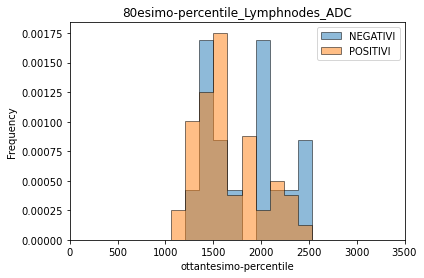

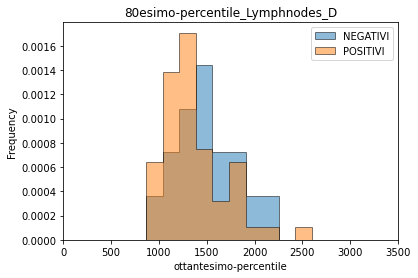

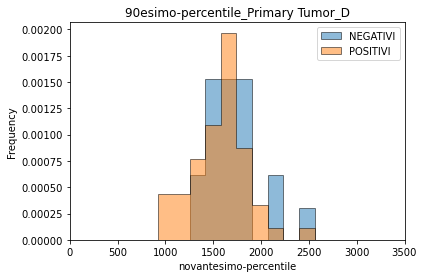

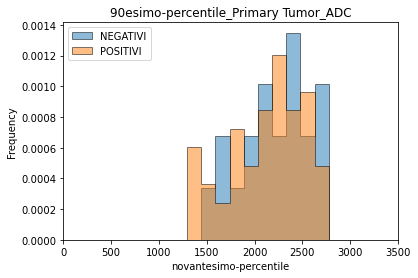

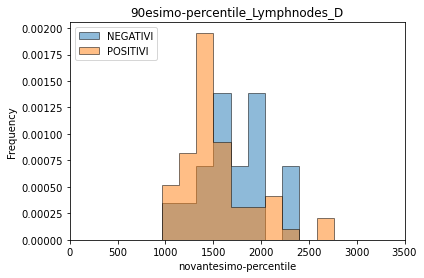

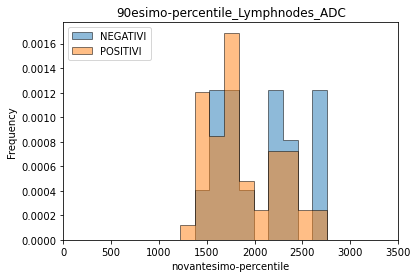

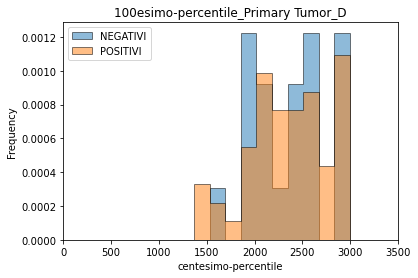

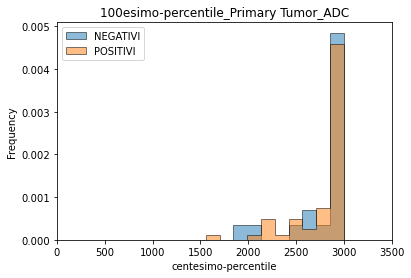

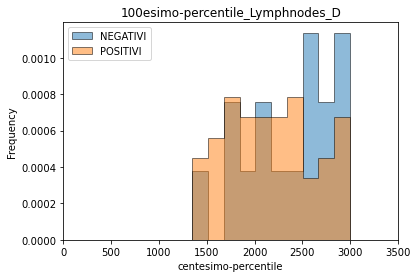

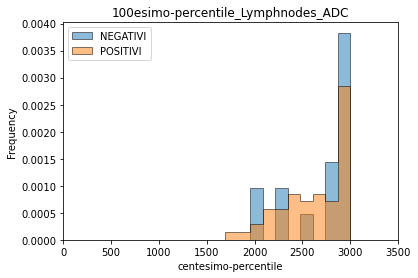

In [13]:
import os
import numpy as np
import imageio 
from imageio import imread
import pydicom
import glob
import math 
from pydicom.filereader import dcmread
import matplotlib.pyplot as plt
from itertools import chain, groupby
import operator
import pandas as pd
from collections import Counter
import nibabel as nib

#decompressa lo zip, spostare la cartella file_nifti in C:\
path = "C:\\Users\\marya\\Desktop\\materiali tesi\\file_nifti\\MAPPE2021\\MAPPE_ADC_D\\**\\*.nii"

list_dicom = []
obj_dicom = {} 

for filename_dicom in glob.iglob(path,recursive = True): #elenco tutti i path 
    filename_dicom = filename_dicom.split("\\") #divisione del path in array
    
    if len(filename_dicom) > 9:
        
        obj_dicom.update({"nomePaziente": filename_dicom[8], "files":[filename_dicom[-1]]})
        list_dicom.append(obj_dicom.copy())
        
    data = sorted(list_dicom, key=lambda x: x['nomePaziente']) #ordino la lista per pazienti in modo crescente 
    res_dicom = [{'nomePaziente': k, 'files': list(chain.from_iterable(y['files'] for y in g))} for k, g in groupby(data, key=lambda x: x['nomePaziente'])]


array_excel = []
array_excel2 = []
array_intensita = []
obj_excel={'paziente':'','medie':[]}

# # print(array_excel)
for p in res_dicom:
    nome = p['nomePaziente']
    for file in p['files'][:-1]:
        
        coefficente = file.split('\\')[-1][:-4]
             
    #lettura immagini ADC_D
        file = f'C:\\Users\\marya\\Desktop\\materiali tesi\\file_nifti\\MAPPE2021\\MAPPE_ADC_D\\{nome}\\{file}'
        
        nifti_file = nib.load(file)
        nifti_array = nifti_file.get_fdata() 
        dim = nifti_array.shape
        
        ConstPixelDims = (dim[2], int(256), int(256)) #lunghezza array 
        ArrayDicom = np.zeros(ConstPixelDims) #array di zeri
        
        N = np.array(nifti_array , float)
        ArrayDicom = N
        
    
        # LETTURA IMMAGINI ROI 
        file_roi= f'C:\\Users\\marya\\Desktop\\materiali tesi\\file_nifti\\MAPPE2021\\MAPPE_ADC_D\\{nome}\\{nome}-label.nii'

        nifti_roi = nib.load(file_roi)
        nifti_roi_array = nifti_roi.get_fdata() 
        img2 = np.array(nifti_roi_array, dtype=np.int16)   #converisione immagine roi in array 

        value_repeat= np.unique(img2) #valori univoci nel array 
        
        max_repeat_value = np.bincount(img2.ravel())# trovo il numero di riperizioni nell array nello stesso ordine del value repeat 
        max_repeat_value = max_repeat_value[max_repeat_value != 0] # rimuovo tutti i valori 0

        mapping_value = dict(zip(value_repeat, max_repeat_value)) # ho mappato in chiave(value_repeat) e in valore(max_repeat_value)
#         print(mapping_value)
        # rimuovo 0 e 1
        del mapping_value[0]
        value_repeat = np.delete(value_repeat,0)
        if 1 in mapping_value.keys():
            roi_pt = 1
            del mapping_value[1]
            value_repeat = np.delete(value_repeat,0)
        else:
            roi_pt = 0

        dev_standard_lymphnodes = None
        media_roi_lymphnodes = None
        intesitylymphnodes = None
        key_for_value_max = None
        standard_error_lymphnodes = None
        n_pixel_lymphnodes = None
        negative_sum_pixel_lymp = None
        decile_lymphnodes= None
        venti_percentile_lymphonodes = None
        trenta_percentile_lymphonodes= None
        quarta_percentile_lymphonodes= None
        mediana_lymphnodes= None
        sessanta_percentile_lymphonodes= None
        settanta_percentile_lymphonodes= None
        ottanta_percentile_lymphonodes= None
        novanta_percentile_lymphnodes=None
        cento_percentile_lymphonodes= None

#-----------------calcoli per i linfonodi
        if value_repeat.size > 0:
            key_for_value_max = max(mapping_value.items(), key=operator.itemgetter(1))[0] # prendo la prima chiave con il valore massimo
            intesitylymphnodes=ArrayDicom[img2==key_for_value_max]

            negative_sum_pixel_lymp = np.sum(intesitylymphnodes<0)
            intesitylymphnodes = intesitylymphnodes[intesitylymphnodes>0] #escudo valore negativi
            intesitylymphnodes = np.array([ele for ele in intesitylymphnodes if Counter(intesitylymphnodes)[ele] < 5],float) # tolgo il picco finale 

            mask = (intesitylymphnodes > 300) & (intesitylymphnodes < 3000) #limite intervallo 300-3000
            lymphnodes=(intesitylymphnodes[mask])
            dev_standard_lymphnodes = lymphnodes.std() #calcolo std linfonodo
            media_roi_lymphnodes = lymphnodes.mean()   #calcolo media linfonodo
            n_pixel_lymphnodes = np.size(intesitylymphnodes)
            standard_error_lymphnodes = np.std(intesitylymphnodes, ddof=1) / np.sqrt(n_pixel_lymphnodes)
            decile_array_lymphnodes=sorted(intesitylymphnodes[mask]) #ordine crescente array
            decile_lymphnodes= np.percentile(decile_array_lymphnodes,10) #calcolo decile
            venti_percentile_lymphonodes= np.percentile(decile_array_lymphnodes,20)
            trenta_percentile_lymphonodes= np.percentile(decile_array_lymphnodes,30)
            quarta_percentile_lymphonodes= np.percentile(decile_array_lymphnodes,40)
            mediana_lymphnodes= np.percentile(decile_array_lymphnodes,50) #calcolo mediana
            sessanta_percentile_lymphonodes= np.percentile(decile_array_lymphnodes,60)
            settanta_percentile_lymphonodes= np.percentile(decile_array_lymphnodes,70)
            ottanta_percentile_lymphonodes= np.percentile(decile_array_lymphnodes,80)
            novanta_percentile_lymphnodes=np.percentile(decile_array_lymphnodes,90) #calcolo novantesimo-percentile
            cento_percentile_lymphonodes= np.percentile(decile_array_lymphnodes,100)


        else:
            intesitylymphnodes = []  #array nullo se non c'è ROI maggiore di 1 

        intesityIsWhereRoi1 = []
        dev_standard_1 = None
        media_roi_1 = None
        standard_error_1 = None
        n_pixel_1 = None
        negative_sum_pixel_pt = None
        decile_PT= None
        venti_percentile_PT = None
        trenta_percentile_PT= None
        quarta_percentile_PT= None
        mediana_PT= None
        sessanta_percentile_PT= None
        settanta_percentile_PT= None
        ottanta_percentile_PT= None
        novanta_percentile_PT=None
        cento_percentile_PT= None

        intesityIsWhereRoi1=ArrayDicom[img2==1]
        negative_sum_pixel_pt = np.sum(intesityIsWhereRoi1<0)
        intesityIsWhereRoi1= intesityIsWhereRoi1[intesityIsWhereRoi1>0] # escludo valori negativi  
        intesityIsWhereRoi1 = np.array([ele for ele in intesityIsWhereRoi1 if Counter(intesityIsWhereRoi1)[ele] < 5],float) #tolgo il picco finale

#                 #titolo istogramma
        if len(intesitylymphnodes) > 0:
             
            plt.title("Patient:{} - {}\n mean_lymphnodes={:1.2f} +/-{:1.2f}\n".format(nome , coefficente, media_roi_lymphnodes, standard_error_lymphnodes ))


# ---------------------------------------calcoli roi primary tumor
            if len(intesityIsWhereRoi1) > 0:

                mask = (intesityIsWhereRoi1 > 300) & (intesityIsWhereRoi1 < 3000)
                primarytumor= (intesityIsWhereRoi1[mask])
                dev_standard_1 = primarytumor.std() 
                media_roi_1 = primarytumor.mean() 
                n_pixel_1 = np.size(intesityIsWhereRoi1)
                standard_error_1 = np.std(intesityIsWhereRoi1, ddof=1) / np.sqrt(n_pixel_1)
                decile_array_pt=sorted(intesityIsWhereRoi1[mask])
                decile_PT= np.percentile(decile_array_pt,10)
                venti_percentile_PT = np.percentile(decile_array_pt,20)
                trenta_percentile_PT= np.percentile(decile_array_pt,30)
                quarta_percentile_PT= np.percentile(decile_array_pt,40)
                mediana_PT=np.percentile(decile_array_pt,50)
                sessanta_percentile_PT= np.percentile(decile_array_pt,60)
                settanta_percentile_PT= np.percentile(decile_array_pt,70)
                ottanta_percentile_PT= np.percentile(decile_array_pt,80)
                novanta_percentile_PT=np.percentile(decile_array_pt, 90)
                cento_percentile_PT= np.percentile(decile_array_pt,100)
                
                plt.title("Patient:{} - {}\n mean={:1.2f}  +/-{:1.2f}\n mean_lymphnodes={:1.2f}  +/-{:1.2f}\n".format(nome ,coefficente, media_roi_1 ,standard_error_1, media_roi_lymphnodes, standard_error_lymphnodes))

        else:
            
            mask = (intesityIsWhereRoi1 > 300) & (intesityIsWhereRoi1 < 3000) 
            primarytumor= (intesityIsWhereRoi1[mask])
            dev_standard_1 = primarytumor.std() 

            media_roi_1 = primarytumor.mean() 
            n_pixel_1 = np.size(intesityIsWhereRoi1)
            standard_error_1 = np.std(intesityIsWhereRoi1, ddof=1) / np.sqrt(n_pixel_1)
            decile_array_pt=sorted(intesityIsWhereRoi1[mask])
            decile_PT= np.percentile(decile_array_pt,10)
            venti_percentile_PT = np.percentile(decile_array_pt,20)
            trenta_percentile_PT= np.percentile(decile_array_pt,30)
            quarta_percentile_PT= np.percentile(decile_array_pt,40)
            mediana_PT=np.percentile(decile_array_pt,50)
            sessanta_percentile_PT= np.percentile(decile_array_pt,60)
            settanta_percentile_PT= np.percentile(decile_array_pt,70)
            ottanta_percentile_PT= np.percentile(decile_array_pt,80)
            novanta_percentile_PT=np.percentile(decile_array_pt, 90)
            cento_percentile_PT= np.percentile(decile_array_pt,100)

            plt.title("Patient:{} - {}\n mean={:1.2f} +/- {:1.2f}\n ".format(nome , coefficente, media_roi_1, standard_error_1))

        kwargs = dict(histtype='stepfilled', color=['Orange', 'Blue'], fill=True, alpha=0.3, density=True, ec="k", bins= np.linspace(0,5000,30))
        plt.hist([intesityIsWhereRoi1,intesitylymphnodes], **kwargs)
        plt.xlabel("Value")
        plt.ylabel("Pixel")
        plt.xlim(0, 5000)
        labels= ["lymphnode","primary tumor"]
        plt.legend( labels, loc="upper right")                 
        path_save = "C:\\Users\\marya\\Desktop\\materiali tesi\\grafici pazienti\\"
        plt.savefig(path_save+str(f"patinet-{nome}-{coefficente}.jpeg"), bbox_inches='tight')#salvare istogramma 
        plt.show()

#--------------tabelle-----------------
        
        obj = {'paziente': nome,
               'coefficente':coefficente,
                'roi_lymphnodes': key_for_value_max or 0, 
                'n_pixel_lymphnodes': n_pixel_lymphnodes or 0,
                'dev_standard_lymphnodes':dev_standard_lymphnodes or 0,
                'media_roi_lymphnodes':media_roi_lymphnodes or 0,
                'standard_error_lymphnodes' : standard_error_lymphnodes or 0,
                'roi_PT': roi_pt, 
                'n_pixel_PT' : n_pixel_1 or 0,
                'dev_standard_PT':dev_standard_1 or 0,
                'media_roi_PT':media_roi_1 or 0,
                'standard_error_PT': standard_error_1 or 0,
                'negative_pixel_pt': negative_sum_pixel_pt or 0,
                'negative_pixel_lymp': negative_sum_pixel_lymp or 0
                
                }
        array_excel.append(obj)
        
        objpercentile=  {'paziente': nome,
                           'coefficente':coefficente,
                           '10%_PT':  decile_PT or 0,
                           '20%_PT':venti_percentile_PT or 0,
                           '30%_PT': trenta_percentile_PT or 0,
                           '40%_PT':quarta_percentile_PT or 0,
                           '50%_PT': mediana_PT or 0,
                           '60%_PT':sessanta_percentile_PT or 0,
                           '70%_PT': settanta_percentile_PT or 0,
                           '80%_PT': ottanta_percentile_PT or 0,
                           '90%_PT': novanta_percentile_PT or 0,
                           '100%_PT': cento_percentile_PT or 0,
                           '10%_lymphnodes': decile_lymphnodes or 0,
                           '20%_lymphnodes': venti_percentile_lymphonodes or 0,
                           '30%_lymphnodes': trenta_percentile_lymphonodes or 0, 
                           '40%_lymphnodes': quarta_percentile_lymphonodes or 0,
                           '50%_lymphnodes': mediana_lymphnodes or 0,
                           '60%_lymphnodes': sessanta_percentile_lymphonodes or 0,
                           '70%_lymphnodes': settanta_percentile_lymphonodes or 0,
                           '80%_lymphnodes': ottanta_percentile_lymphonodes or 0,
                           '90%_lymphnodes': novanta_percentile_lymphnodes or 0,
                           '100%_lymphnodes': cento_percentile_lymphonodes or 0

                            }
        array_excel2.append(objpercentile)

# TABELLA 1
df = pd.DataFrame(array_excel,columns=array_excel[0].keys()) # creo la tabella
df.to_excel("tabella_test_nii.xlsx")   # trasformo la tabella in excel
print('saved')


#TABELLA 2
df = pd.DataFrame(array_excel2,columns=array_excel2[0].keys()) # creo la tabella
df.to_excel("tabella_percentile.xlsx")   # trasformo la tabella in excel
print('saved')


          
pazienti_negativi = ['PAZ01_AN',
                    'PAZ06_BAS',
                    'PAZ10_BON',
                    'PAZ15_CAN',
                    'PAZ17_CARA',
                    'PAZ22_DAN',
                    'PAZ26_DIV',
                    'PAZ36_GIORGE',
                    'PAZ37_GIORGI',
                    'PAZ38_GIZ',
                    'PAZ44_LOM',
                    'PAZ48_MLUC',
                    'PAZ49_MLUI',
                    'PAZ55_PAN',
                    'PAZ58_PASQ',
                    'PAZ59_PAT',
                    'PAZ63_POMO',
                    'PAZ64_PON',
                    'PAZ65_PUR',
                    'PAZ69_RIC'
                    ]
   
for o in array_excel:
    for p_n in pazienti_negativi:
        
        if o['paziente'] == p_n:
            o['hpv'] =False
            break
        else:
            o['hpv'] = True
            
for o in array_excel2:
    for p_n in pazienti_negativi:
        
        if o['paziente'] == p_n:
            o['hpv'] =False
            break
        else:
            o['hpv'] = True
            
# print(array_excel)

positivi_D = []
positivi_ADC = []
negativi_D = []
negativi_ADC = []

for a in array_excel:
    if a['hpv'] : #positivi
        if a['coefficente'] == 'D':
            positivi_D.append(a)
        else:
            positivi_ADC.append(a)
    else: #negativi
        if a['coefficente'] == 'D':
            negativi_D.append(a)
        else:
            negativi_ADC.append(a)
            
positivi_perc_D = []
positivi_perc_ADC = []
negativi_perc_D = []
negativi_perc_ADC = []
            
for a in array_excel2:
    if a['hpv'] : #positivi
        if a['coefficente'] == 'D':
            positivi_perc_D.append(a)
        else:
            positivi_perc_ADC.append(a)
    else: #negativi
        if a['coefficente'] == 'D':
            negativi_perc_D.append(a)
        else:
            negativi_perc_ADC.append(a)
            
            
# ------------------- Funzione genera istogrammi      
def create_hist(title_hist, key, array_NEG, array_POS, xlabel):
    global df_n
    global df_p
    global pds
    
    df_n = pd.DataFrame({'NEGATIVI': [d[f'{key}'] for d in array_NEG]})
    df_p = pd.DataFrame({'POSITIVI': [d[f'{key}'] for d in array_POS]}) 
    pds= pd.concat([df_n, df_p])
    pds=pds[pds>0]
    pds.plot.hist(histtype='stepfilled',alpha=.5, ec="k",density=True)
    plt.xlabel(f"{xlabel}")
    plt.xlim(0, 3500)
    plt.title(f'{title_hist}')
    path_save = "C:\\Users\\marya\\Desktop\\materiali tesi\\Grafici\\"
    plt.savefig(path_save+str(f"{title_hist}.jpeg"))
    
create_hist('Mean_Primary-Tumor_D','media_roi_PT',negativi_D,positivi_D,'Mean')
create_hist('Mean_Primary Tumor_ADC','media_roi_PT',negativi_ADC,positivi_ADC,'Mean')
create_hist('Mean_lymphnodes_D','media_roi_lymphnodes',negativi_D,positivi_D,'Mean')
create_hist('Mean_lymphnodes_ADC','media_roi_lymphnodes',negativi_ADC,positivi_ADC,'Mean')
create_hist('Standard deviation_Primary Tumor_ADC','dev_standard_PT',negativi_ADC,positivi_ADC,'standard deviation')
create_hist('Standard deviation_Primary Tumor_D','dev_standard_PT',negativi_D,positivi_D,'standard deviation')
create_hist('Standard deviation_Lymphnodes_ADC','dev_standard_lymphnodes',negativi_ADC,positivi_ADC,'standard deviation')
create_hist('Standard deviation_Lymphnodes_D','dev_standard_lymphnodes',negativi_D,positivi_D,'standard deviation') 
create_hist('Decile_Primary Tumor_D','10%_PT',negativi_perc_D,positivi_perc_D,'decile')
create_hist('Decile_Primary Tumor_ADC','10%_PT',negativi_perc_ADC,positivi_perc_ADC,'decile')
create_hist('Decile_Lymphnodes_ADC', '10%_lymphnodes',negativi_perc_ADC,positivi_perc_ADC,'decile')
create_hist('Decile_Lymphnodes_D','10%_lymphnodes',negativi_perc_D,positivi_perc_D,'decile')
create_hist('20esimo-percentile_Primary Tumor_D','20%_PT',negativi_perc_D,positivi_perc_D,'ventesimo-percentile')
create_hist('20esimo-percentile_Primary Tumor_ADC','20%_PT',negativi_perc_ADC,positivi_perc_ADC,'ventesimo-percentile')
create_hist('20esimo-percentile_Lymphnodes_ADC','20%_lymphnodes',negativi_perc_ADC,positivi_perc_ADC,'ventesimo-percentile')
create_hist('20esimo-percentile_Lymphnodes_D','20%_lymphnodes',negativi_perc_D,positivi_perc_D,'ventesimo-percentile')
create_hist('30esimo-percentile_Primary Tumor_D','30%_PT',negativi_perc_D,positivi_perc_D,'trentesimo-percentile')
create_hist('30esimo-percentile_Primary Tumor_ADC','30%_PT',negativi_perc_ADC,positivi_perc_ADC,'trentesimo-percentile')
create_hist('30esimo-percentile_Lymphnodes_D','30%_lymphnodes',negativi_perc_D,positivi_perc_D,'trentesimo-percentile')
create_hist('30esimo-percentile_Lymphnodes_ADC','30%_lymphnodes',negativi_perc_ADC,positivi_perc_ADC,'trentesimo-percentile')
create_hist('40esimo-percentile_Primary Tumor_D','40%_PT',negativi_perc_D,positivi_perc_D,'quarantesimo-percentile')
create_hist('40esimo-percentile_Primary Tumor_ADC','40%_PT',negativi_perc_ADC,positivi_perc_ADC,'quarantesimo-percentile')
create_hist('40esimo-percentile_Lymphnodes_D','40%_lymphnodes',negativi_perc_D,positivi_perc_D,'quarantesimo-percentile')
create_hist('40esimo-percentile_Lymphnodes_ADC','40%_lymphnodes',negativi_perc_ADC,positivi_perc_ADC,'quarantesimo-percentile')
create_hist('Mediana_Primary Tumor_D','50%_PT',negativi_perc_D,positivi_perc_D,'mediana')
create_hist('Mediana_Primary Tumor_ADC','50%_PT',negativi_perc_ADC,positivi_perc_ADC,'mediana')
create_hist('Mediana-percentile_Lymphnodes_D','50%_lymphnodes',negativi_perc_D,positivi_perc_D,'mediana')
create_hist('Mediana-percentile_Lymphnodes_ADC','50%_lymphnodes',negativi_perc_ADC,positivi_perc_ADC,'mediana')
create_hist('60esimo-percentile_Primary Tumor_D','60%_PT',negativi_perc_D,positivi_perc_D,'sessantesimo-percentile')
create_hist('60esimo-percentile_Primary Tumor_ADC','60%_PT',negativi_perc_ADC,positivi_perc_ADC,'sessantesimo-percentile')
create_hist('60esimo-percentile_Lymphnodes_D','60%_lymphnodes',negativi_perc_D,positivi_perc_D,'sessantesimo-percentile')
create_hist('60esimo-percentile_Lymphnodes_ADC','60%_lymphnodes',negativi_perc_ADC,positivi_perc_ADC,'sessantesimo-percentile')
create_hist('70esimo-percentile_Primary Tumor_D','70%_PT',negativi_perc_D,positivi_perc_D,'settantesimo-percentile')
create_hist('70esimo-percentile_Primary Tumor_ADC','70%_PT',negativi_perc_ADC,positivi_perc_ADC,'settantesimo-percentile')
create_hist('70esimo-percentile_Lymphnodes_D','70%_lymphnodes',negativi_perc_D,positivi_perc_D,'settantesimo-percentile')
create_hist('70esimo-percentile_Lymphnodes_ADC','70%_lymphnodes',negativi_perc_ADC,positivi_perc_ADC,'settantesimo-percentile')
create_hist('80esimo-percentile_Primary Tumor_D','80%_PT',negativi_perc_D,positivi_perc_D,'ottantesimo-percentile')
create_hist('80esimo-percentile_Primary Tumor_ADC','80%_PT',negativi_perc_ADC,positivi_perc_ADC,'ottantesimo-percentile')
create_hist('80esimo-percentile_Lymphnodes_ADC','80%_lymphnodes',negativi_perc_ADC,positivi_perc_ADC,'ottantesimo-percentile')
create_hist('80esimo-percentile_Lymphnodes_D','80%_lymphnodes',negativi_perc_D,positivi_perc_D,'ottantesimo-percentile')
create_hist('90esimo-percentile_Primary Tumor_D','90%_PT',negativi_perc_D,positivi_perc_D,'novantesimo-percentile')
create_hist('90esimo-percentile_Primary Tumor_ADC','90%_PT',negativi_perc_ADC,positivi_perc_ADC,'novantesimo-percentile')
create_hist('90esimo-percentile_Lymphnodes_D','90%_lymphnodes',negativi_perc_D,positivi_perc_D,'novantesimo-percentile')
create_hist('90esimo-percentile_Lymphnodes_ADC','90%_lymphnodes',negativi_perc_ADC,positivi_perc_ADC,'novantesimo-percentile')
create_hist('100esimo-percentile_Primary Tumor_D','100%_PT',negativi_perc_D,positivi_perc_D,'centesimo-percentile')
create_hist('100esimo-percentile_Primary Tumor_ADC','100%_PT',negativi_perc_ADC,positivi_perc_ADC,'centesimo-percentile')
create_hist('100esimo-percentile_Lymphnodes_D','100%_lymphnodes',negativi_perc_D,positivi_perc_D,'centesimo-percentile')
create_hist('100esimo-percentile_Lymphnodes_ADC','100%_lymphnodes',negativi_perc_ADC,positivi_perc_ADC,'centesimo-percentile')








    
